In [1]:
import root_numpy as rnp

Welcome to JupyROOT 6.22/08


In [2]:
import uproot3

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [81]:
fname="../data/0806/Run_1k_findhits_0806.root"

In [82]:
f = uproot3.open(fname)

In [83]:
y0 = f['T'].array('globalhits')['globalhit0']
y1 = f['T'].array('globalhits')['globalhit1']
y2 = f['T'].array('globalhits')['globalhit2']
y3 = f['T'].array('globalhits')['globalhit3']
y4 = f['T'].array('globalhits')['globalhit4']

In [84]:
x0 = f['T'].array('globalhits')['globalhit5']
x1 = f['T'].array('globalhits')['globalhit6']
x2 = f['T'].array('globalhits')['globalhit7']
x3 = f['T'].array('globalhits')['globalhit8']
x4 = f['T'].array('globalhits')['globalhit9']

In [85]:
zx0= 354
zx1 = 324
zx2 = 290
zx3 = 74.1
zx4 = 7.8

zy0= 358
zy1= 328
zy2 = 294
zy3= 78.1
zy4= 11.8

zx0= 344
zx1 = 312.5
zx2 = 273
zx3 = 74.1
zx4 = 7.8

zy0= 348
zy1= 312.5
zy2 = 277
zy3= 78.1
zy4= 11.8

##### Import variables according to vertexing software

In [86]:
xs=[x0,x1,x2,x3, x4]
ys = [y0, y1, y2, y3, y4]
zxs = [zx0, zx1, zx2, zx3, zx4]
zys = [zy0, zy1, zy2, zy3, zy4]

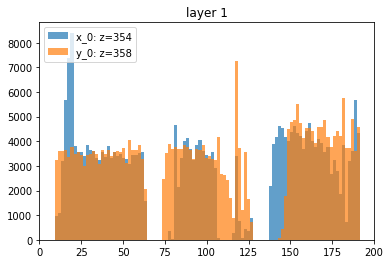

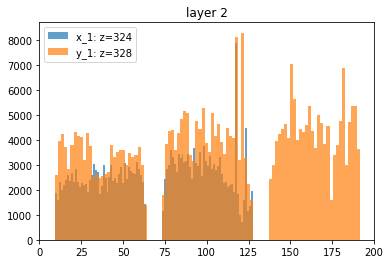

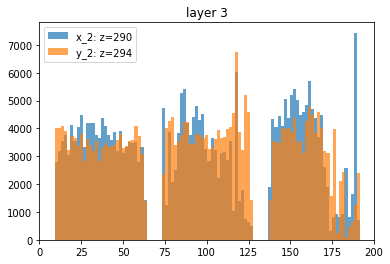

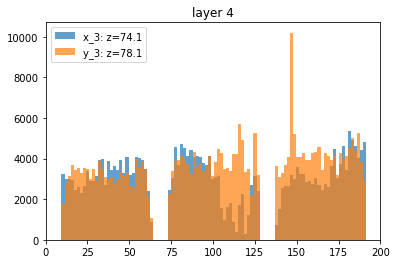

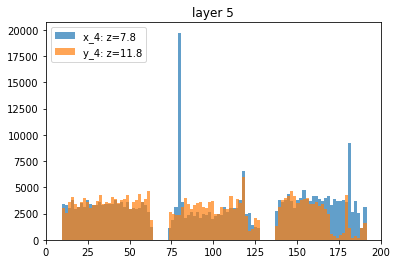

In [87]:
for i, (x,y, zx, zy) in enumerate(zip(xs,ys, zxs, zys)):
    plt.hist(x[x!=-1], bins=100, alpha=0.7, label='x_{}: z={}'.format(i, zx))
    plt.hist(y[y!=-1], bins=100, alpha=0.7, label='y_{}: z={}'.format(i, zy))
    plt.legend(loc='upper left')
    #plt.ylim(0,10000)
    plt.xlim(0,200)
    plt.title('layer {}'.format(i+1))
    plt.show()

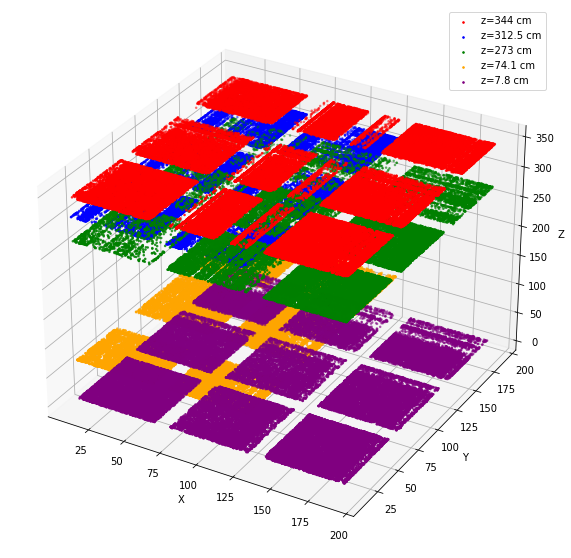

In [52]:
fig = plt.figure(figsize=(10,10))
colors =['red', 'blue', 'green','orange', 'purple']
ax = fig.add_subplot(111,projection="3d")
for (x, y, zx, zy, col) in zip (xs, ys, zxs, zys, colors):
    ax.scatter(x[(x!=-1) & (y!=-1)], 
               y[(x!=-1) & (y!=-1)],  
               zx, 
               c=col, label="z={} cm".format(zx), s=2.5)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.legend(loc='upper right')
plt.show()

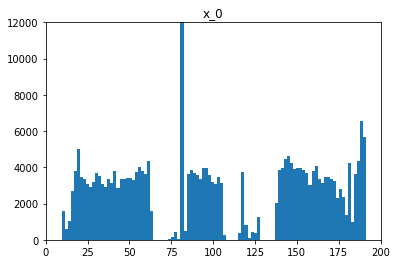

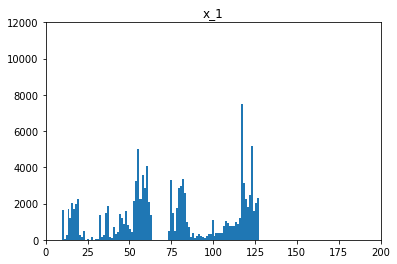

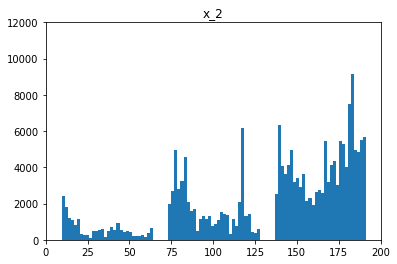

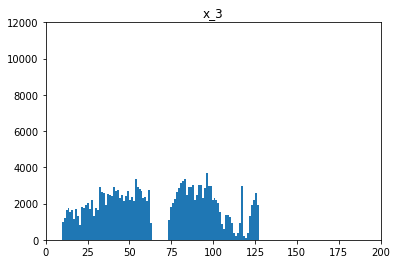

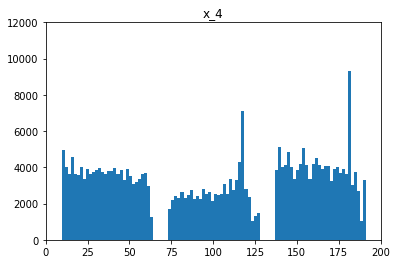

In [67]:
for i, x in enumerate(xs):
    plt.hist(x[x!=-1], bins=100)
    plt.title('x_{}'.format(i))
    plt.xlim(0,200)
    plt.ylim(0,12000)
    plt.show()

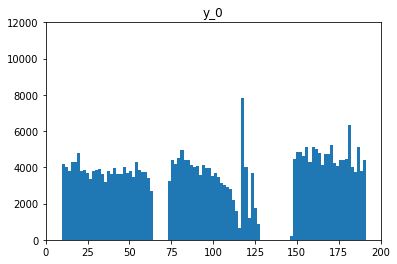

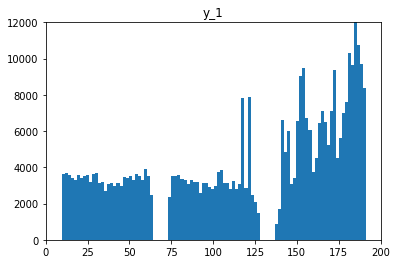

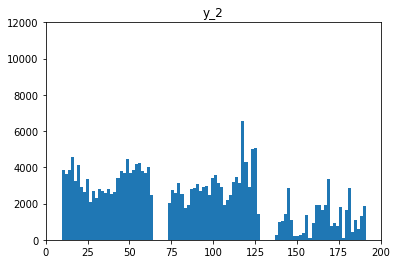

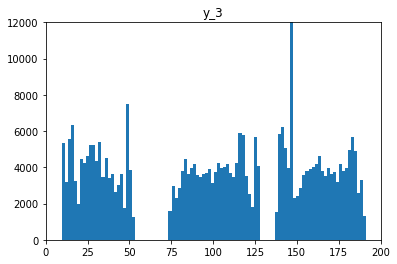

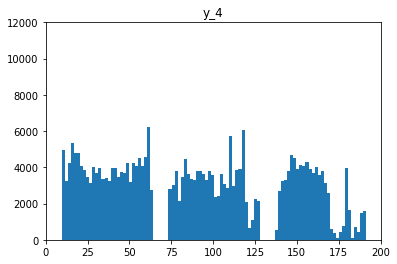

In [69]:
for i, y in enumerate(ys):
    plt.hist(y[y!=-1], bins=100)
    plt.title('y_{}'.format(i))
    plt.xlim(0,200)
    plt.ylim(0,12000)
    plt.show()

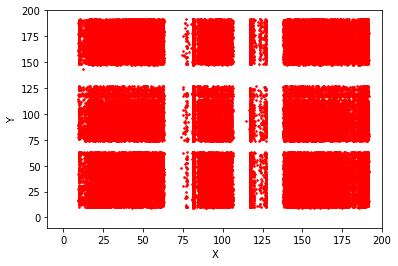

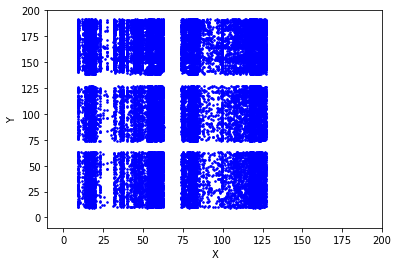

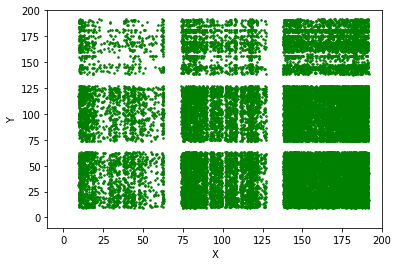

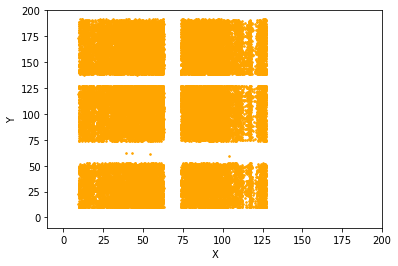

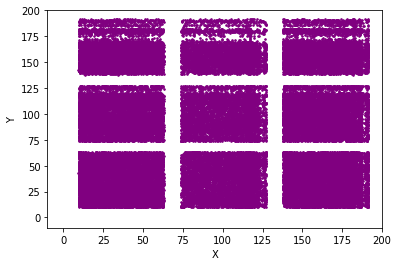

In [53]:
colors =['red', 'blue', 'green','orange', 'purple']
for (x, y,col) in zip (xs, ys, colors):
    plt.scatter(x[np.logical_and(x!=-1, y!=-1)], y[np.logical_and(x!=-1, y!=-1)], c=col, s=2.5)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.xlim(-10,200)
    plt.ylim(-10,200)
    plt.show()

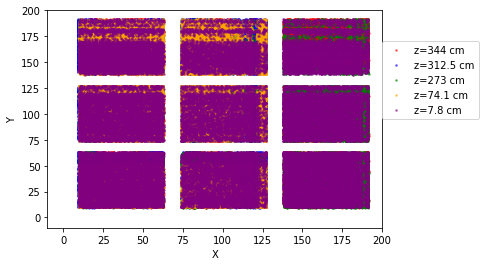

In [54]:
colors =['red', 'blue', 'green','orange', 'purple']
for (x, y, zx, zy, col) in zip (xs, ys, zxs, zys, colors):
    plt.scatter(x[np.logical_and(x!=-1, y!=-1)], y[np.logical_and(x!=-1, y!=-1)], 
                c=col, label="z={} cm".format(zx), s=2.5, alpha=0.5)

plt.xlabel('X')
plt.ylabel('Y')
plt.legend(loc=(1,.5))
plt.xlim(-10,200)
plt.ylim(-10,200)
plt.show()

In [73]:
xs = np.asarray(xs)
ys = np.asarray(ys)

In [75]:
hit0 = f['T'].array('hits')['hit0']

In [76]:
hit0.shape

(2090141,)

In [78]:
hits_y = np.zeros((15, 2090141))

In [101]:
hits_x = np.zeros((15, 2090141))

In [111]:
for i in np.arange(0,15):
    print('hit{}'.format(i))
    hits_y[i] = f['T'].array('hits')['hit{}'.format(i)]

hit0
hit1
hit2
hit3
hit4
hit5
hit6
hit7
hit8
hit9
hit10
hit11
hit12
hit13
hit14


In [113]:
for i in np.arange(15, 30):
    print('hit{}'.format(i))
    hits_x[i-15] = f['T'].array('hits')['hit{}'.format(i)]

hit15
hit16
hit17
hit18
hit19
hit20
hit21
hit22
hit23
hit24
hit25
hit26
hit27
hit28
hit29


In [93]:
lcr = 0
ids = np.arange(0,15,3)+lcr

In [95]:
np.array([hits_y[rpc]!=-1 for rpc in ids])

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False,  True, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [ True,  True, False, ..., False, False, False]])

In [85]:
sel = np.where((hits_y[0]!=-1) & (hits_y[3]!=-1) & (hits_y[6]!=-1)
        & (hits_y[9]!=-1) & (hits_y[12]!=-1))

In [114]:
ids

array([ 0,  3,  6,  9, 12])

In [ ]:
for idx in ids:
    

In [132]:
rpc_0_sel = hits_y[ids][0][hits_y[ids][0]!=-1]

In [133]:
rpc_1_sel = hits_y[ids][1][hits_y[ids][1]!=-1]

In [149]:
fname = '../Run_new_100files_findhits.root'
f100 = uproot3.open(fname)

In [151]:
f100['T'].array('hits')[ 'hit0'].shape

(121637,)

In [152]:
hits_y = np.zeros((15, 121637))
hits_x = np.zeros((15, 121637))

In [153]:
for i in np.arange(0,15):
    print('hit{}'.format(i))
    hits_y[i] = f100['T'].array('hits')['hit{}'.format(i)]

for i in np.arange(15, 30):
    print('hit{}'.format(i))
    hits_x[i-15] = f100['T'].array('hits')['hit{}'.format(i)]


hit0
hit1
hit2
hit3
hit4
hit5
hit6
hit7
hit8
hit9
hit10
hit11
hit12
hit13
hit14
hit15
hit16
hit17
hit18
hit19
hit20
hit21
hit22
hit23
hit24
hit25
hit26
hit27
hit28
hit29


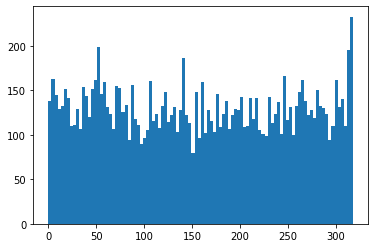

In [162]:
plt.hist(hits_y[ids][0][hits_y[ids][0]!=-1], bins=100)
plt.show()

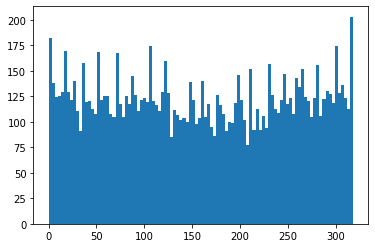

In [163]:
plt.hist(hits_y[ids][1][hits_y[ids][1]!=-1], bins=100)
plt.show()

In [160]:
for i, hit1 in enumerate(hits_y[ids][0][hits_y[ids][0]!=-1]):
    for j, hit2 in enumerate(hits_y[ids][1][hits_y[ids][1]!=-1]):
        if hit1==hit2:
            print(i,j, hit1, hit2)

0 404 65.0 65.0
0 588 65.0 65.0
0 730 65.0 65.0
0 1068 65.0 65.0
0 1084 65.0 65.0
0 1407 65.0 65.0
0 2003 65.0 65.0
0 2075 65.0 65.0
0 2116 65.0 65.0
0 2558 65.0 65.0
0 3347 65.0 65.0
0 4350 65.0 65.0
0 4373 65.0 65.0
0 4663 65.0 65.0
0 5114 65.0 65.0
0 5148 65.0 65.0
0 5975 65.0 65.0
0 6597 65.0 65.0
0 6742 65.0 65.0
0 6889 65.0 65.0
0 7056 65.0 65.0
0 7124 65.0 65.0
0 7161 65.0 65.0
0 8428 65.0 65.0
0 8681 65.0 65.0
0 8843 65.0 65.0
0 8852 65.0 65.0
0 9053 65.0 65.0
0 9416 65.0 65.0
0 9418 65.0 65.0
0 9667 65.0 65.0
0 9864 65.0 65.0
0 10834 65.0 65.0
0 11775 65.0 65.0
1 742 223.0 223.0
1 1339 223.0 223.0
1 1885 223.0 223.0
1 1898 223.0 223.0
1 1927 223.0 223.0
1 1982 223.0 223.0
1 2605 223.0 223.0
1 3081 223.0 223.0
1 3206 223.0 223.0
1 3214 223.0 223.0
1 4201 223.0 223.0
1 4388 223.0 223.0
1 4435 223.0 223.0
1 5227 223.0 223.0
1 5597 223.0 223.0
1 6243 223.0 223.0
1 6258 223.0 223.0
1 6432 223.0 223.0
1 6535 223.0 223.0
1 6628 223.0 223.0
1 7297 223.0 223.0
1 8003 223.0 223.0
1 8086

12 4042 10.0 10.0
12 4063 10.0 10.0
12 4079 10.0 10.0
12 4126 10.0 10.0
12 4831 10.0 10.0
12 4917 10.0 10.0
12 5222 10.0 10.0
12 5358 10.0 10.0
12 6064 10.0 10.0
12 6227 10.0 10.0
12 6340 10.0 10.0
12 6476 10.0 10.0
12 6505 10.0 10.0
12 6515 10.0 10.0
12 7129 10.0 10.0
12 7266 10.0 10.0
12 7273 10.0 10.0
12 7720 10.0 10.0
12 8619 10.0 10.0
12 8981 10.0 10.0
12 9227 10.0 10.0
12 9781 10.0 10.0
12 10767 10.0 10.0
12 11125 10.0 10.0
12 11520 10.0 10.0
12 11831 10.0 10.0
12 12252 10.0 10.0
13 114 206.0 206.0
13 1499 206.0 206.0
13 1512 206.0 206.0
13 1715 206.0 206.0
13 1828 206.0 206.0
13 3812 206.0 206.0
13 3900 206.0 206.0
13 4533 206.0 206.0
13 4629 206.0 206.0
13 4683 206.0 206.0
13 5415 206.0 206.0
13 5638 206.0 206.0
13 5805 206.0 206.0
13 6304 206.0 206.0
13 6496 206.0 206.0
13 6606 206.0 206.0
13 7626 206.0 206.0
13 7807 206.0 206.0
13 8143 206.0 206.0
13 8239 206.0 206.0
13 8868 206.0 206.0
13 9035 206.0 206.0
13 9156 206.0 206.0
13 9771 206.0 206.0
13 10155 206.0 206.0
13 10266 

31 5790 204.0 204.0
31 6009 204.0 204.0
31 6439 204.0 204.0
31 6699 204.0 204.0
31 6711 204.0 204.0
31 6878 204.0 204.0
31 7219 204.0 204.0
31 7992 204.0 204.0
31 8210 204.0 204.0
31 8536 204.0 204.0
31 8633 204.0 204.0
31 9015 204.0 204.0
31 9121 204.0 204.0
31 9143 204.0 204.0
31 9335 204.0 204.0
31 9721 204.0 204.0
31 9756 204.0 204.0
31 9920 204.0 204.0
31 10031 204.0 204.0
31 10032 204.0 204.0
31 10434 204.0 204.0
31 10948 204.0 204.0
31 10949 204.0 204.0
31 11170 204.0 204.0
31 11287 204.0 204.0
31 11457 204.0 204.0
31 12082 204.0 204.0
32 728 210.0 210.0
32 874 210.0 210.0
32 878 210.0 210.0
32 1091 210.0 210.0
32 2703 210.0 210.0
32 3143 210.0 210.0
32 4010 210.0 210.0
32 4271 210.0 210.0
32 4961 210.0 210.0
32 4989 210.0 210.0
32 5576 210.0 210.0
32 5770 210.0 210.0
32 5918 210.0 210.0
32 6133 210.0 210.0
32 6276 210.0 210.0
32 6313 210.0 210.0
32 6920 210.0 210.0
32 7225 210.0 210.0
32 7436 210.0 210.0
32 7495 210.0 210.0
32 7625 210.0 210.0
32 8116 210.0 210.0
32 8214 210.0 

41 200 315.0 315.0
41 256 315.0 315.0
41 442 315.0 315.0
41 459 315.0 315.0
41 464 315.0 315.0
41 618 315.0 315.0
41 631 315.0 315.0
41 1380 315.0 315.0
41 1491 315.0 315.0
41 1575 315.0 315.0
41 1698 315.0 315.0
41 1755 315.0 315.0
41 1831 315.0 315.0
41 1999 315.0 315.0
41 2132 315.0 315.0
41 2218 315.0 315.0
41 2292 315.0 315.0
41 2343 315.0 315.0
41 2841 315.0 315.0
41 2909 315.0 315.0
41 2944 315.0 315.0
41 2973 315.0 315.0
41 3170 315.0 315.0
41 3467 315.0 315.0
41 3485 315.0 315.0
41 3604 315.0 315.0
41 3922 315.0 315.0
41 3948 315.0 315.0
41 3949 315.0 315.0
41 4178 315.0 315.0
41 4248 315.0 315.0
41 4317 315.0 315.0
41 4333 315.0 315.0
41 4578 315.0 315.0
41 4664 315.0 315.0
41 4704 315.0 315.0
41 4710 315.0 315.0
41 5060 315.0 315.0
41 5106 315.0 315.0
41 5288 315.0 315.0
41 5412 315.0 315.0
41 5453 315.0 315.0
41 5548 315.0 315.0
41 5792 315.0 315.0
41 5917 315.0 315.0
41 5980 315.0 315.0
41 5981 315.0 315.0
41 6347 315.0 315.0
41 6502 315.0 315.0
41 6787 315.0 315.0
41 6947

59 8512 285.0 285.0
59 8626 285.0 285.0
59 8698 285.0 285.0
59 9679 285.0 285.0
59 10029 285.0 285.0
59 10218 285.0 285.0
59 10401 285.0 285.0
59 10601 285.0 285.0
59 12047 285.0 285.0
60 586 231.0 231.0
60 894 231.0 231.0
60 1170 231.0 231.0
60 1571 231.0 231.0
60 1961 231.0 231.0
60 1977 231.0 231.0
60 2087 231.0 231.0
60 2858 231.0 231.0
60 3103 231.0 231.0
60 3180 231.0 231.0
60 3186 231.0 231.0
60 3448 231.0 231.0
60 3562 231.0 231.0
60 3872 231.0 231.0
60 3945 231.0 231.0
60 5124 231.0 231.0
60 5293 231.0 231.0
60 5431 231.0 231.0
60 5478 231.0 231.0
60 5540 231.0 231.0
60 5730 231.0 231.0
60 6011 231.0 231.0
60 6080 231.0 231.0
60 6095 231.0 231.0
60 6280 231.0 231.0
60 6631 231.0 231.0
60 6794 231.0 231.0
60 7000 231.0 231.0
60 7123 231.0 231.0
60 7290 231.0 231.0
60 7861 231.0 231.0
60 8193 231.0 231.0
60 8236 231.0 231.0
60 8450 231.0 231.0
60 8656 231.0 231.0
60 8819 231.0 231.0
60 8908 231.0 231.0
60 9020 231.0 231.0
60 9540 231.0 231.0
60 10115 231.0 231.0
60 10166 231.0 2

80 9111 259.0 259.0
80 9284 259.0 259.0
80 9388 259.0 259.0
80 10210 259.0 259.0
80 10284 259.0 259.0
80 10442 259.0 259.0
80 10708 259.0 259.0
80 10748 259.0 259.0
80 11048 259.0 259.0
80 11198 259.0 259.0
80 11278 259.0 259.0
80 11346 259.0 259.0
80 11630 259.0 259.0
80 11654 259.0 259.0
81 72 51.0 51.0
81 273 51.0 51.0
81 283 51.0 51.0
81 290 51.0 51.0
81 325 51.0 51.0
81 608 51.0 51.0
81 693 51.0 51.0
81 1613 51.0 51.0
81 2283 51.0 51.0
81 2722 51.0 51.0
81 3204 51.0 51.0
81 3803 51.0 51.0
81 3807 51.0 51.0
81 3869 51.0 51.0
81 3971 51.0 51.0
81 4171 51.0 51.0
81 4180 51.0 51.0
81 4203 51.0 51.0
81 4220 51.0 51.0
81 4466 51.0 51.0
81 4652 51.0 51.0
81 4793 51.0 51.0
81 4887 51.0 51.0
81 4938 51.0 51.0
81 5398 51.0 51.0
81 5503 51.0 51.0
81 5990 51.0 51.0
81 6465 51.0 51.0
81 6520 51.0 51.0
81 6720 51.0 51.0
81 6930 51.0 51.0
81 6935 51.0 51.0
81 7070 51.0 51.0
81 7210 51.0 51.0
81 7254 51.0 51.0
81 7712 51.0 51.0
81 7934 51.0 51.0
81 8148 51.0 51.0
81 8532 51.0 51.0
81 8576 51.0 51

100 616 142.0 142.0
100 1390 142.0 142.0
100 2017 142.0 142.0
100 3055 142.0 142.0
100 3891 142.0 142.0
100 4513 142.0 142.0
100 5101 142.0 142.0
100 5144 142.0 142.0
100 6051 142.0 142.0
100 6621 142.0 142.0
100 7729 142.0 142.0
100 7933 142.0 142.0
100 8738 142.0 142.0
100 9923 142.0 142.0
100 10299 142.0 142.0
100 10408 142.0 142.0
100 11250 142.0 142.0
100 11294 142.0 142.0
100 11724 142.0 142.0
100 12162 142.0 142.0
101 582 78.0 78.0
101 816 78.0 78.0
101 945 78.0 78.0
101 1057 78.0 78.0
101 1793 78.0 78.0
101 2037 78.0 78.0
101 2308 78.0 78.0
101 2377 78.0 78.0
101 2632 78.0 78.0
101 2650 78.0 78.0
101 3220 78.0 78.0
101 3958 78.0 78.0
101 3962 78.0 78.0
101 4215 78.0 78.0
101 4574 78.0 78.0
101 4738 78.0 78.0
101 5208 78.0 78.0
101 5960 78.0 78.0
101 6149 78.0 78.0
101 6397 78.0 78.0
101 6928 78.0 78.0
101 7089 78.0 78.0
101 7632 78.0 78.0
101 7645 78.0 78.0
101 7757 78.0 78.0
101 7835 78.0 78.0
101 8180 78.0 78.0
101 8284 78.0 78.0
101 9674 78.0 78.0
101 10222 78.0 78.0
101 102

120 10597 74.0 74.0
120 10732 74.0 74.0
120 10923 74.0 74.0
120 11126 74.0 74.0
120 12131 74.0 74.0
121 602 311.0 311.0
121 1164 311.0 311.0
121 1541 311.0 311.0
121 1569 311.0 311.0
121 1700 311.0 311.0
121 1891 311.0 311.0
121 2251 311.0 311.0
121 3589 311.0 311.0
121 4312 311.0 311.0
121 4451 311.0 311.0
121 4646 311.0 311.0
121 5102 311.0 311.0
121 5121 311.0 311.0
121 5699 311.0 311.0
121 6186 311.0 311.0
121 6591 311.0 311.0
121 6796 311.0 311.0
121 7325 311.0 311.0
121 7714 311.0 311.0
121 8201 311.0 311.0
121 8259 311.0 311.0
121 8360 311.0 311.0
121 8812 311.0 311.0
121 8918 311.0 311.0
121 9049 311.0 311.0
121 9076 311.0 311.0
121 9204 311.0 311.0
121 9394 311.0 311.0
121 9487 311.0 311.0
121 9498 311.0 311.0
121 10692 311.0 311.0
121 11400 311.0 311.0
121 11767 311.0 311.0
121 12165 311.0 311.0
122 45 300.0 300.0
122 381 300.0 300.0
122 617 300.0 300.0
122 780 300.0 300.0
122 805 300.0 300.0
122 921 300.0 300.0
122 1425 300.0 300.0
122 2250 300.0 300.0
122 2354 300.0 300.0
1

140 252 14.0 14.0
140 299 14.0 14.0
140 788 14.0 14.0
140 981 14.0 14.0
140 1217 14.0 14.0
140 1687 14.0 14.0
140 2396 14.0 14.0
140 2880 14.0 14.0
140 2915 14.0 14.0
140 3375 14.0 14.0
140 3583 14.0 14.0
140 3628 14.0 14.0
140 3701 14.0 14.0
140 3714 14.0 14.0
140 4264 14.0 14.0
140 4267 14.0 14.0
140 5196 14.0 14.0
140 5274 14.0 14.0
140 5359 14.0 14.0
140 5393 14.0 14.0
140 5880 14.0 14.0
140 6250 14.0 14.0
140 6273 14.0 14.0
140 6419 14.0 14.0
140 6993 14.0 14.0
140 7580 14.0 14.0
140 7868 14.0 14.0
140 8108 14.0 14.0
140 8431 14.0 14.0
140 8581 14.0 14.0
140 8713 14.0 14.0
140 8914 14.0 14.0
140 9040 14.0 14.0
140 9336 14.0 14.0
140 9400 14.0 14.0
140 9464 14.0 14.0
140 9612 14.0 14.0
140 9785 14.0 14.0
140 9873 14.0 14.0
140 10459 14.0 14.0
140 10713 14.0 14.0
140 10810 14.0 14.0
140 11005 14.0 14.0
140 11065 14.0 14.0
140 11114 14.0 14.0
140 11265 14.0 14.0
140 11529 14.0 14.0
140 11873 14.0 14.0
141 95 146.0 146.0
141 839 146.0 146.0
141 856 146.0 146.0
141 1162 146.0 146.0
141

159 11521 32.0 32.0
159 12151 32.0 32.0
160 10 266.0 266.0
160 198 266.0 266.0
160 677 266.0 266.0
160 1056 266.0 266.0
160 1269 266.0 266.0
160 1741 266.0 266.0
160 1860 266.0 266.0
160 2958 266.0 266.0
160 3508 266.0 266.0
160 3927 266.0 266.0
160 4102 266.0 266.0
160 4791 266.0 266.0
160 5265 266.0 266.0
160 5788 266.0 266.0
160 6306 266.0 266.0
160 6632 266.0 266.0
160 6649 266.0 266.0
160 6798 266.0 266.0
160 7120 266.0 266.0
160 7378 266.0 266.0
160 8354 266.0 266.0
160 8409 266.0 266.0
160 8567 266.0 266.0
160 9069 266.0 266.0
160 9206 266.0 266.0
160 9288 266.0 266.0
160 9441 266.0 266.0
160 9706 266.0 266.0
160 9765 266.0 266.0
160 10413 266.0 266.0
160 10921 266.0 266.0
160 11472 266.0 266.0
160 11518 266.0 266.0
160 11977 266.0 266.0
161 44 159.0 159.0
161 367 159.0 159.0
161 428 159.0 159.0
161 790 159.0 159.0
161 877 159.0 159.0
161 1344 159.0 159.0
161 1484 159.0 159.0
161 1826 159.0 159.0
161 2327 159.0 159.0
161 2685 159.0 159.0
161 2690 159.0 159.0
161 2889 159.0 159.0

180 195 138.0 138.0
180 301 138.0 138.0
180 1151 138.0 138.0
180 1551 138.0 138.0
180 1586 138.0 138.0
180 1636 138.0 138.0
180 1661 138.0 138.0
180 1876 138.0 138.0
180 2275 138.0 138.0
180 2686 138.0 138.0
180 2780 138.0 138.0
180 3541 138.0 138.0
180 3855 138.0 138.0
180 4476 138.0 138.0
180 4677 138.0 138.0
180 4680 138.0 138.0
180 4690 138.0 138.0
180 4695 138.0 138.0
180 5045 138.0 138.0
180 5231 138.0 138.0
180 5300 138.0 138.0
180 5832 138.0 138.0
180 6344 138.0 138.0
180 6866 138.0 138.0
180 7845 138.0 138.0
180 7939 138.0 138.0
180 8177 138.0 138.0
180 8606 138.0 138.0
180 8683 138.0 138.0
180 9253 138.0 138.0
180 9296 138.0 138.0
180 9876 138.0 138.0
180 9895 138.0 138.0
180 10071 138.0 138.0
180 10079 138.0 138.0
180 10151 138.0 138.0
180 11532 138.0 138.0
180 11858 138.0 138.0
180 12188 138.0 138.0
181 783 102.0 102.0
181 833 102.0 102.0
181 982 102.0 102.0
181 1282 102.0 102.0
181 1290 102.0 102.0
181 1301 102.0 102.0
181 2740 102.0 102.0
181 2868 102.0 102.0
181 2999 102

200 2178 1.0 1.0
200 2306 1.0 1.0
200 2436 1.0 1.0
200 2667 1.0 1.0
200 2730 1.0 1.0
200 2747 1.0 1.0
200 3500 1.0 1.0
200 3609 1.0 1.0
200 4235 1.0 1.0
200 4446 1.0 1.0
200 4499 1.0 1.0
200 4599 1.0 1.0
200 5422 1.0 1.0
200 5429 1.0 1.0
200 5986 1.0 1.0
200 6007 1.0 1.0
200 6233 1.0 1.0
200 6331 1.0 1.0
200 6929 1.0 1.0
200 6938 1.0 1.0
200 6986 1.0 1.0
200 7721 1.0 1.0
200 7735 1.0 1.0
200 7756 1.0 1.0
200 7996 1.0 1.0
200 8398 1.0 1.0
200 8917 1.0 1.0
200 9373 1.0 1.0
200 9560 1.0 1.0
200 9988 1.0 1.0
200 10050 1.0 1.0
200 10491 1.0 1.0
200 10648 1.0 1.0
200 10715 1.0 1.0
200 11339 1.0 1.0
200 11611 1.0 1.0
200 11992 1.0 1.0
200 12265 1.0 1.0
201 67 30.0 30.0
201 500 30.0 30.0
201 1003 30.0 30.0
201 1348 30.0 30.0
201 1645 30.0 30.0
201 1758 30.0 30.0
201 2173 30.0 30.0
201 2700 30.0 30.0
201 2851 30.0 30.0
201 2966 30.0 30.0
201 3109 30.0 30.0
201 3444 30.0 30.0
201 4071 30.0 30.0
201 4385 30.0 30.0
201 4589 30.0 30.0
201 5055 30.0 30.0
201 5783 30.0 30.0
201 5925 30.0 30.0
201 630

218 9509 302.0 302.0
218 9584 302.0 302.0
218 9707 302.0 302.0
218 9755 302.0 302.0
218 9926 302.0 302.0
218 10139 302.0 302.0
218 10183 302.0 302.0
218 10433 302.0 302.0
218 10457 302.0 302.0
218 11096 302.0 302.0
218 11629 302.0 302.0
218 11752 302.0 302.0
218 11947 302.0 302.0
218 11954 302.0 302.0
219 127 21.0 21.0
219 208 21.0 21.0
219 501 21.0 21.0
219 694 21.0 21.0
219 1169 21.0 21.0
219 1307 21.0 21.0
219 1693 21.0 21.0
219 2062 21.0 21.0
219 2209 21.0 21.0
219 2946 21.0 21.0
219 3020 21.0 21.0
219 3110 21.0 21.0
219 3672 21.0 21.0
219 3692 21.0 21.0
219 3821 21.0 21.0
219 4640 21.0 21.0
219 4924 21.0 21.0
219 5034 21.0 21.0
219 5524 21.0 21.0
219 5718 21.0 21.0
219 5820 21.0 21.0
219 6157 21.0 21.0
219 6816 21.0 21.0
219 7085 21.0 21.0
219 7413 21.0 21.0
219 7505 21.0 21.0
219 7594 21.0 21.0
219 7694 21.0 21.0
219 8283 21.0 21.0
219 8329 21.0 21.0
219 9042 21.0 21.0
219 9065 21.0 21.0
219 9857 21.0 21.0
219 10124 21.0 21.0
219 10580 21.0 21.0
219 10724 21.0 21.0
219 11468 21.0

237 6023 54.0 54.0
237 7035 54.0 54.0
237 7733 54.0 54.0
237 7744 54.0 54.0
237 8625 54.0 54.0
237 8966 54.0 54.0
237 9091 54.0 54.0
237 9576 54.0 54.0
237 9793 54.0 54.0
237 10556 54.0 54.0
237 11064 54.0 54.0
237 11314 54.0 54.0
237 11442 54.0 54.0
237 11662 54.0 54.0
237 11875 54.0 54.0
237 12262 54.0 54.0
237 12264 54.0 54.0
238 547 140.0 140.0
238 1017 140.0 140.0
238 2097 140.0 140.0
238 2411 140.0 140.0
238 2456 140.0 140.0
238 2789 140.0 140.0
238 2949 140.0 140.0
238 3314 140.0 140.0
238 3401 140.0 140.0
238 3408 140.0 140.0
238 3647 140.0 140.0
238 4346 140.0 140.0
238 5083 140.0 140.0
238 5584 140.0 140.0
238 5883 140.0 140.0
238 6665 140.0 140.0
238 6903 140.0 140.0
238 7032 140.0 140.0
238 7063 140.0 140.0
238 7215 140.0 140.0
238 7680 140.0 140.0
238 7945 140.0 140.0
238 7987 140.0 140.0
238 8882 140.0 140.0
238 9170 140.0 140.0
238 9310 140.0 140.0
238 9639 140.0 140.0
238 9682 140.0 140.0
238 9867 140.0 140.0
238 10332 140.0 140.0
238 11840 140.0 140.0
238 12053 140.0 1

256 6119 6.0 6.0
256 6159 6.0 6.0
256 6568 6.0 6.0
256 6789 6.0 6.0
256 6868 6.0 6.0
256 6956 6.0 6.0
256 7091 6.0 6.0
256 7160 6.0 6.0
256 7481 6.0 6.0
256 7600 6.0 6.0
256 8059 6.0 6.0
256 8294 6.0 6.0
256 9032 6.0 6.0
256 9238 6.0 6.0
256 9477 6.0 6.0
256 9906 6.0 6.0
256 10113 6.0 6.0
256 10288 6.0 6.0
256 10351 6.0 6.0
256 10425 6.0 6.0
256 10464 6.0 6.0
256 10716 6.0 6.0
256 11362 6.0 6.0
256 11502 6.0 6.0
256 11941 6.0 6.0
257 126 193.0 193.0
257 214 193.0 193.0
257 1093 193.0 193.0
257 1769 193.0 193.0
257 1772 193.0 193.0
257 2143 193.0 193.0
257 2373 193.0 193.0
257 2410 193.0 193.0
257 2725 193.0 193.0
257 2801 193.0 193.0
257 3793 193.0 193.0
257 3910 193.0 193.0
257 5316 193.0 193.0
257 6074 193.0 193.0
257 6153 193.0 193.0
257 6383 193.0 193.0
257 6781 193.0 193.0
257 7125 193.0 193.0
257 7176 193.0 193.0
257 7781 193.0 193.0
257 8013 193.0 193.0
257 9654 193.0 193.0
257 10224 193.0 193.0
257 10291 193.0 193.0
257 10586 193.0 193.0
257 12049 193.0 193.0
258 187 35.0 35.0


275 2772 208.0 208.0
275 2805 208.0 208.0
275 3086 208.0 208.0
275 3759 208.0 208.0
275 3874 208.0 208.0
275 4045 208.0 208.0
275 4608 208.0 208.0
275 4779 208.0 208.0
275 7285 208.0 208.0
275 8757 208.0 208.0
275 9178 208.0 208.0
275 9340 208.0 208.0
275 10316 208.0 208.0
275 10695 208.0 208.0
275 10698 208.0 208.0
275 11448 208.0 208.0
275 12037 208.0 208.0
275 12230 208.0 208.0
276 136 170.0 170.0
276 247 170.0 170.0
276 398 170.0 170.0
276 703 170.0 170.0
276 876 170.0 170.0
276 1735 170.0 170.0
276 2146 170.0 170.0
276 2464 170.0 170.0
276 2609 170.0 170.0
276 2758 170.0 170.0
276 3032 170.0 170.0
276 3131 170.0 170.0
276 4415 170.0 170.0
276 4534 170.0 170.0
276 4877 170.0 170.0
276 4884 170.0 170.0
276 5436 170.0 170.0
276 5855 170.0 170.0
276 6212 170.0 170.0
276 6605 170.0 170.0
276 8105 170.0 170.0
276 8158 170.0 170.0
276 8554 170.0 170.0
276 8985 170.0 170.0
276 8992 170.0 170.0
276 9117 170.0 170.0
276 9135 170.0 170.0
276 9687 170.0 170.0
276 11252 170.0 170.0
276 11719 1

286 8164 179.0 179.0
286 8898 179.0 179.0
286 8926 179.0 179.0
286 9285 179.0 179.0
286 9439 179.0 179.0
286 10051 179.0 179.0
286 10190 179.0 179.0
286 10432 179.0 179.0
286 10454 179.0 179.0
286 10830 179.0 179.0
286 11516 179.0 179.0
286 11925 179.0 179.0
286 12088 179.0 179.0
287 29 41.0 41.0
287 57 41.0 41.0
287 263 41.0 41.0
287 270 41.0 41.0
287 587 41.0 41.0
287 822 41.0 41.0
287 859 41.0 41.0
287 1258 41.0 41.0
287 2177 41.0 41.0
287 2280 41.0 41.0
287 2421 41.0 41.0
287 2826 41.0 41.0
287 4094 41.0 41.0
287 4227 41.0 41.0
287 4397 41.0 41.0
287 5133 41.0 41.0
287 6365 41.0 41.0
287 6936 41.0 41.0
287 6943 41.0 41.0
287 7022 41.0 41.0
287 7253 41.0 41.0
287 7415 41.0 41.0
287 7800 41.0 41.0
287 7976 41.0 41.0
287 8257 41.0 41.0
287 8756 41.0 41.0
287 8864 41.0 41.0
287 8874 41.0 41.0
287 9353 41.0 41.0
287 9378 41.0 41.0
287 9385 41.0 41.0
287 9565 41.0 41.0
287 9629 41.0 41.0
287 9684 41.0 41.0
287 10755 41.0 41.0
287 10944 41.0 41.0
287 11095 41.0 41.0
287 11247 41.0 41.0
28

297 4550 32.0 32.0
297 5005 32.0 32.0
297 5158 32.0 32.0
297 5731 32.0 32.0
297 6206 32.0 32.0
297 6341 32.0 32.0
297 6865 32.0 32.0
297 6950 32.0 32.0
297 6967 32.0 32.0
297 7755 32.0 32.0
297 7776 32.0 32.0
297 8162 32.0 32.0
297 8256 32.0 32.0
297 8543 32.0 32.0
297 8646 32.0 32.0
297 8891 32.0 32.0
297 9934 32.0 32.0
297 9956 32.0 32.0
297 10349 32.0 32.0
297 10490 32.0 32.0
297 11521 32.0 32.0
297 12151 32.0 32.0
298 220 262.0 262.0
298 702 262.0 262.0
298 803 262.0 262.0
298 867 262.0 262.0
298 1034 262.0 262.0
298 1095 262.0 262.0
298 1119 262.0 262.0
298 1648 262.0 262.0
298 2133 262.0 262.0
298 2942 262.0 262.0
298 3038 262.0 262.0
298 3095 262.0 262.0
298 3442 262.0 262.0
298 3456 262.0 262.0
298 3648 262.0 262.0
298 3973 262.0 262.0
298 4176 262.0 262.0
298 4245 262.0 262.0
298 4432 262.0 262.0
298 4554 262.0 262.0
298 4760 262.0 262.0
298 5828 262.0 262.0
298 6136 262.0 262.0
298 6355 262.0 262.0
298 6374 262.0 262.0
298 6872 262.0 262.0
298 6949 262.0 262.0
298 7309 262.0 

316 10213 229.0 229.0
316 10539 229.0 229.0
316 10561 229.0 229.0
316 10805 229.0 229.0
316 11057 229.0 229.0
316 11111 229.0 229.0
316 11137 229.0 229.0
316 12028 229.0 229.0
316 12068 229.0 229.0
316 12206 229.0 229.0
317 485 316.0 316.0
317 819 316.0 316.0
317 1042 316.0 316.0
317 1411 316.0 316.0
317 1479 316.0 316.0
317 1528 316.0 316.0
317 1634 316.0 316.0
317 1765 316.0 316.0
317 1786 316.0 316.0
317 1850 316.0 316.0
317 1916 316.0 316.0
317 2043 316.0 316.0
317 2054 316.0 316.0
317 2081 316.0 316.0
317 2512 316.0 316.0
317 2782 316.0 316.0
317 2785 316.0 316.0
317 2872 316.0 316.0
317 2879 316.0 316.0
317 3005 316.0 316.0
317 3287 316.0 316.0
317 3340 316.0 316.0
317 3365 316.0 316.0
317 3417 316.0 316.0
317 3427 316.0 316.0
317 3547 316.0 316.0
317 3568 316.0 316.0
317 3747 316.0 316.0
317 3758 316.0 316.0
317 3946 316.0 316.0
317 3999 316.0 316.0
317 4034 316.0 316.0
317 4100 316.0 316.0
317 4169 316.0 316.0
317 4294 316.0 316.0
317 4300 316.0 316.0
317 4411 316.0 316.0
317 4

334 12154 55.0 55.0
335 469 34.0 34.0
335 1039 34.0 34.0
335 1452 34.0 34.0
335 1712 34.0 34.0
335 3019 34.0 34.0
335 3033 34.0 34.0
335 5460 34.0 34.0
335 6274 34.0 34.0
335 6555 34.0 34.0
335 6604 34.0 34.0
335 7162 34.0 34.0
335 7866 34.0 34.0
335 8482 34.0 34.0
335 9352 34.0 34.0
335 9860 34.0 34.0
335 10894 34.0 34.0
335 10935 34.0 34.0
335 11924 34.0 34.0
336 2 270.0 270.0
336 70 270.0 270.0
336 269 270.0 270.0
336 604 270.0 270.0
336 709 270.0 270.0
336 792 270.0 270.0
336 954 270.0 270.0
336 1005 270.0 270.0
336 1296 270.0 270.0
336 1470 270.0 270.0
336 2058 270.0 270.0
336 2180 270.0 270.0
336 2843 270.0 270.0
336 2856 270.0 270.0
336 3457 270.0 270.0
336 3991 270.0 270.0
336 4210 270.0 270.0
336 4511 270.0 270.0
336 4659 270.0 270.0
336 5113 270.0 270.0
336 5733 270.0 270.0
336 5789 270.0 270.0
336 6692 270.0 270.0
336 6743 270.0 270.0
336 6818 270.0 270.0
336 7049 270.0 270.0
336 7233 270.0 270.0
336 7265 270.0 270.0
336 7782 270.0 270.0
336 7915 270.0 270.0
336 8014 270.0 2

357 3351 54.0 54.0
357 3919 54.0 54.0
357 3942 54.0 54.0
357 4232 54.0 54.0
357 4281 54.0 54.0
357 4295 54.0 54.0
357 4339 54.0 54.0
357 4552 54.0 54.0
357 4681 54.0 54.0
357 4696 54.0 54.0
357 4784 54.0 54.0
357 5371 54.0 54.0
357 6023 54.0 54.0
357 7035 54.0 54.0
357 7733 54.0 54.0
357 7744 54.0 54.0
357 8625 54.0 54.0
357 8966 54.0 54.0
357 9091 54.0 54.0
357 9576 54.0 54.0
357 9793 54.0 54.0
357 10556 54.0 54.0
357 11064 54.0 54.0
357 11314 54.0 54.0
357 11442 54.0 54.0
357 11662 54.0 54.0
357 11875 54.0 54.0
357 12262 54.0 54.0
357 12264 54.0 54.0
358 863 172.0 172.0
358 971 172.0 172.0
358 1046 172.0 172.0
358 2475 172.0 172.0
358 2481 172.0 172.0
358 3248 172.0 172.0
358 3563 172.0 172.0
358 3698 172.0 172.0
358 3780 172.0 172.0
358 3907 172.0 172.0
358 4386 172.0 172.0
358 5989 172.0 172.0
358 6003 172.0 172.0
358 6369 172.0 172.0
358 6441 172.0 172.0
358 6811 172.0 172.0
358 7152 172.0 172.0
358 7208 172.0 172.0
358 7968 172.0 172.0
358 8268 172.0 172.0
358 8817 172.0 172.0
35

378 403 13.0 13.0
378 491 13.0 13.0
378 1040 13.0 13.0
378 1168 13.0 13.0
378 1202 13.0 13.0
378 1596 13.0 13.0
378 1707 13.0 13.0
378 2153 13.0 13.0
378 2188 13.0 13.0
378 2291 13.0 13.0
378 2483 13.0 13.0
378 3193 13.0 13.0
378 4103 13.0 13.0
378 4393 13.0 13.0
378 4404 13.0 13.0
378 4493 13.0 13.0
378 4770 13.0 13.0
378 5238 13.0 13.0
378 5382 13.0 13.0
378 5441 13.0 13.0
378 5727 13.0 13.0
378 6058 13.0 13.0
378 6168 13.0 13.0
378 6242 13.0 13.0
378 6293 13.0 13.0
378 6498 13.0 13.0
378 6745 13.0 13.0
378 6856 13.0 13.0
378 7761 13.0 13.0
378 7805 13.0 13.0
378 7932 13.0 13.0
378 8470 13.0 13.0
378 9167 13.0 13.0
378 9260 13.0 13.0
378 9661 13.0 13.0
378 9925 13.0 13.0
378 10159 13.0 13.0
378 10249 13.0 13.0
378 10296 13.0 13.0
378 10436 13.0 13.0
378 10655 13.0 13.0
378 10657 13.0 13.0
378 11015 13.0 13.0
378 11059 13.0 13.0
378 11308 13.0 13.0
378 11466 13.0 13.0
378 12089 13.0 13.0
378 12155 13.0 13.0
379 547 140.0 140.0
379 1017 140.0 140.0
379 2097 140.0 140.0
379 2411 140.0 1

388 995 31.0 31.0
388 2110 31.0 31.0
388 2303 31.0 31.0
388 2648 31.0 31.0
388 2941 31.0 31.0
388 3075 31.0 31.0
388 3168 31.0 31.0
388 3225 31.0 31.0
388 4001 31.0 31.0
388 4194 31.0 31.0
388 4582 31.0 31.0
388 4759 31.0 31.0
388 5177 31.0 31.0
388 5572 31.0 31.0
388 5657 31.0 31.0
388 5776 31.0 31.0
388 5853 31.0 31.0
388 6085 31.0 31.0
388 6291 31.0 31.0
388 6494 31.0 31.0
388 6783 31.0 31.0
388 6863 31.0 31.0
388 7075 31.0 31.0
388 7088 31.0 31.0
388 7261 31.0 31.0
388 7280 31.0 31.0
388 7448 31.0 31.0
388 7948 31.0 31.0
388 8066 31.0 31.0
388 8809 31.0 31.0
388 9185 31.0 31.0
388 9494 31.0 31.0
388 10703 31.0 31.0
388 10750 31.0 31.0
388 10833 31.0 31.0
388 10872 31.0 31.0
388 10922 31.0 31.0
388 10966 31.0 31.0
388 11299 31.0 31.0
388 11356 31.0 31.0
388 11717 31.0 31.0
389 307 212.0 212.0
389 476 212.0 212.0
389 610 212.0 212.0
389 717 212.0 212.0
389 850 212.0 212.0
389 961 212.0 212.0
389 1218 212.0 212.0
389 1334 212.0 212.0
389 1335 212.0 212.0
389 1633 212.0 212.0
389 1803 

409 7729 142.0 142.0
409 7933 142.0 142.0
409 8738 142.0 142.0
409 9923 142.0 142.0
409 10299 142.0 142.0
409 10408 142.0 142.0
409 11250 142.0 142.0
409 11294 142.0 142.0
409 11724 142.0 142.0
409 12162 142.0 142.0
410 98 199.0 199.0
410 443 199.0 199.0
410 880 199.0 199.0
410 1247 199.0 199.0
410 1402 199.0 199.0
410 1625 199.0 199.0
410 1889 199.0 199.0
410 2080 199.0 199.0
410 2204 199.0 199.0
410 2282 199.0 199.0
410 2820 199.0 199.0
410 3610 199.0 199.0
410 3961 199.0 199.0
410 4122 199.0 199.0
410 4416 199.0 199.0
410 5054 199.0 199.0
410 5210 199.0 199.0
410 5388 199.0 199.0
410 5649 199.0 199.0
410 5766 199.0 199.0
410 5823 199.0 199.0
410 5894 199.0 199.0
410 6236 199.0 199.0
410 6544 199.0 199.0
410 7307 199.0 199.0
410 7474 199.0 199.0
410 7510 199.0 199.0
410 7775 199.0 199.0
410 7858 199.0 199.0
410 7942 199.0 199.0
410 8040 199.0 199.0
410 8669 199.0 199.0
410 8743 199.0 199.0
410 9200 199.0 199.0
410 9586 199.0 199.0
410 9911 199.0 199.0
410 10001 199.0 199.0
410 10059 

432 2410 193.0 193.0
432 2725 193.0 193.0
432 2801 193.0 193.0
432 3793 193.0 193.0
432 3910 193.0 193.0
432 5316 193.0 193.0
432 6074 193.0 193.0
432 6153 193.0 193.0
432 6383 193.0 193.0
432 6781 193.0 193.0
432 7125 193.0 193.0
432 7176 193.0 193.0
432 7781 193.0 193.0
432 8013 193.0 193.0
432 9654 193.0 193.0
432 10224 193.0 193.0
432 10291 193.0 193.0
432 10586 193.0 193.0
432 12049 193.0 193.0
433 136 170.0 170.0
433 247 170.0 170.0
433 398 170.0 170.0
433 703 170.0 170.0
433 876 170.0 170.0
433 1735 170.0 170.0
433 2146 170.0 170.0
433 2464 170.0 170.0
433 2609 170.0 170.0
433 2758 170.0 170.0
433 3032 170.0 170.0
433 3131 170.0 170.0
433 4415 170.0 170.0
433 4534 170.0 170.0
433 4877 170.0 170.0
433 4884 170.0 170.0
433 5436 170.0 170.0
433 5855 170.0 170.0
433 6212 170.0 170.0
433 6605 170.0 170.0
433 8105 170.0 170.0
433 8158 170.0 170.0
433 8554 170.0 170.0
433 8985 170.0 170.0
433 8992 170.0 170.0
433 9117 170.0 170.0
433 9135 170.0 170.0
433 9687 170.0 170.0
433 11252 170.

443 1626 246.0 246.0
443 2000 246.0 246.0
443 2340 246.0 246.0
443 2515 246.0 246.0
443 3042 246.0 246.0
443 3113 246.0 246.0
443 3172 246.0 246.0
443 3640 246.0 246.0
443 4133 246.0 246.0
443 4843 246.0 246.0
443 4909 246.0 246.0
443 5447 246.0 246.0
443 5943 246.0 246.0
443 7351 246.0 246.0
443 7443 246.0 246.0
443 7924 246.0 246.0
443 7940 246.0 246.0
443 8246 246.0 246.0
443 8778 246.0 246.0
443 8815 246.0 246.0
443 8972 246.0 246.0
443 8975 246.0 246.0
443 9132 246.0 246.0
443 9330 246.0 246.0
443 9541 246.0 246.0
443 10129 246.0 246.0
443 10175 246.0 246.0
443 10206 246.0 246.0
443 10760 246.0 246.0
443 11423 246.0 246.0
443 11792 246.0 246.0
443 12124 246.0 246.0
443 12161 246.0 246.0
443 12194 246.0 246.0
444 1128 256.0 256.0
444 1209 256.0 256.0
444 1969 256.0 256.0
444 2608 256.0 256.0
444 3018 256.0 256.0
444 3280 256.0 256.0
444 3486 256.0 256.0
444 3796 256.0 256.0
444 4360 256.0 256.0
444 4878 256.0 256.0
444 5011 256.0 256.0
444 5286 256.0 256.0
444 5323 256.0 256.0
444 

453 9170 140.0 140.0
453 9310 140.0 140.0
453 9639 140.0 140.0
453 9682 140.0 140.0
453 9867 140.0 140.0
453 10332 140.0 140.0
453 11840 140.0 140.0
453 12053 140.0 140.0
454 189 99.0 99.0
454 695 99.0 99.0
454 844 99.0 99.0
454 1289 99.0 99.0
454 1466 99.0 99.0
454 1577 99.0 99.0
454 2253 99.0 99.0
454 2324 99.0 99.0
454 3574 99.0 99.0
454 3621 99.0 99.0
454 3801 99.0 99.0
454 3906 99.0 99.0
454 4061 99.0 99.0
454 4163 99.0 99.0
454 4273 99.0 99.0
454 4734 99.0 99.0
454 5264 99.0 99.0
454 5368 99.0 99.0
454 5696 99.0 99.0
454 5746 99.0 99.0
454 6944 99.0 99.0
454 7250 99.0 99.0
454 7623 99.0 99.0
454 7703 99.0 99.0
454 7707 99.0 99.0
454 7896 99.0 99.0
454 8849 99.0 99.0
454 8861 99.0 99.0
454 9448 99.0 99.0
454 9732 99.0 99.0
454 9810 99.0 99.0
454 10132 99.0 99.0
454 11263 99.0 99.0
454 11735 99.0 99.0
454 11859 99.0 99.0
454 11913 99.0 99.0
454 12135 99.0 99.0
454 12233 99.0 99.0
455 5 149.0 149.0
455 511 149.0 149.0
455 532 149.0 149.0
455 845 149.0 149.0
455 1241 149.0 149.0
455 

463 4239 69.0 69.0
463 4310 69.0 69.0
463 4362 69.0 69.0
463 5301 69.0 69.0
463 5461 69.0 69.0
463 6060 69.0 69.0
463 6181 69.0 69.0
463 6184 69.0 69.0
463 7783 69.0 69.0
463 8137 69.0 69.0
463 9063 69.0 69.0
463 9438 69.0 69.0
463 9904 69.0 69.0
463 10378 69.0 69.0
463 11374 69.0 69.0
463 11935 69.0 69.0
463 12002 69.0 69.0
464 47 198.0 198.0
464 80 198.0 198.0
464 204 198.0 198.0
464 266 198.0 198.0
464 337 198.0 198.0
464 490 198.0 198.0
464 914 198.0 198.0
464 948 198.0 198.0
464 1011 198.0 198.0
464 1018 198.0 198.0
464 1073 198.0 198.0
464 1647 198.0 198.0
464 1658 198.0 198.0
464 1728 198.0 198.0
464 1830 198.0 198.0
464 2169 198.0 198.0
464 2738 198.0 198.0
464 3481 198.0 198.0
464 3654 198.0 198.0
464 3762 198.0 198.0
464 3837 198.0 198.0
464 3956 198.0 198.0
464 4338 198.0 198.0
464 4405 198.0 198.0
464 4593 198.0 198.0
464 5967 198.0 198.0
464 6093 198.0 198.0
464 6105 198.0 198.0
464 6152 198.0 198.0
464 6194 198.0 198.0
464 6202 198.0 198.0
464 6691 198.0 198.0
464 6828 19

474 1315 176.0 176.0
474 1694 176.0 176.0
474 2074 176.0 176.0
474 2468 176.0 176.0
474 3296 176.0 176.0
474 3355 176.0 176.0
474 3558 176.0 176.0
474 4157 176.0 176.0
474 4647 176.0 176.0
474 4765 176.0 176.0
474 4841 176.0 176.0
474 5059 176.0 176.0
474 5093 176.0 176.0
474 5094 176.0 176.0
474 5405 176.0 176.0
474 5468 176.0 176.0
474 5876 176.0 176.0
474 6073 176.0 176.0
474 6125 176.0 176.0
474 6160 176.0 176.0
474 6688 176.0 176.0
474 7037 176.0 176.0
474 7260 176.0 176.0
474 7970 176.0 176.0
474 8774 176.0 176.0
474 8833 176.0 176.0
474 8887 176.0 176.0
474 9038 176.0 176.0
474 9162 176.0 176.0
474 10346 176.0 176.0
474 10474 176.0 176.0
474 10731 176.0 176.0
474 11300 176.0 176.0
474 11587 176.0 176.0
474 11671 176.0 176.0
475 573 176.0 176.0
475 649 176.0 176.0
475 778 176.0 176.0
475 1315 176.0 176.0
475 1694 176.0 176.0
475 2074 176.0 176.0
475 2468 176.0 176.0
475 3296 176.0 176.0
475 3355 176.0 176.0
475 3558 176.0 176.0
475 4157 176.0 176.0
475 4647 176.0 176.0
475 4765 1

485 5727 13.0 13.0
485 6058 13.0 13.0
485 6168 13.0 13.0
485 6242 13.0 13.0
485 6293 13.0 13.0
485 6498 13.0 13.0
485 6745 13.0 13.0
485 6856 13.0 13.0
485 7761 13.0 13.0
485 7805 13.0 13.0
485 7932 13.0 13.0
485 8470 13.0 13.0
485 9167 13.0 13.0
485 9260 13.0 13.0
485 9661 13.0 13.0
485 9925 13.0 13.0
485 10159 13.0 13.0
485 10249 13.0 13.0
485 10296 13.0 13.0
485 10436 13.0 13.0
485 10655 13.0 13.0
485 10657 13.0 13.0
485 11015 13.0 13.0
485 11059 13.0 13.0
485 11308 13.0 13.0
485 11466 13.0 13.0
485 12089 13.0 13.0
485 12155 13.0 13.0
486 125 79.0 79.0
486 326 79.0 79.0
486 345 79.0 79.0
486 430 79.0 79.0
486 463 79.0 79.0
486 614 79.0 79.0
486 650 79.0 79.0
486 1106 79.0 79.0
486 1191 79.0 79.0
486 1198 79.0 79.0
486 1319 79.0 79.0
486 2004 79.0 79.0
486 3085 79.0 79.0
486 3286 79.0 79.0
486 3464 79.0 79.0
486 3524 79.0 79.0
486 3823 79.0 79.0
486 3975 79.0 79.0
486 4461 79.0 79.0
486 4500 79.0 79.0
486 5087 79.0 79.0
486 5392 79.0 79.0
486 5472 79.0 79.0
486 5480 79.0 79.0
486 551

495 2088 46.0 46.0
495 2095 46.0 46.0
495 2211 46.0 46.0
495 2755 46.0 46.0
495 3187 46.0 46.0
495 3247 46.0 46.0
495 3550 46.0 46.0
495 3569 46.0 46.0
495 3840 46.0 46.0
495 4964 46.0 46.0
495 5120 46.0 46.0
495 5558 46.0 46.0
495 5732 46.0 46.0
495 5739 46.0 46.0
495 6032 46.0 46.0
495 6444 46.0 46.0
495 6894 46.0 46.0
495 7137 46.0 46.0
495 7978 46.0 46.0
495 7983 46.0 46.0
495 8220 46.0 46.0
495 8759 46.0 46.0
495 8912 46.0 46.0
495 8937 46.0 46.0
495 8969 46.0 46.0
495 9549 46.0 46.0
495 9664 46.0 46.0
495 9688 46.0 46.0
495 10545 46.0 46.0
495 10815 46.0 46.0
495 11185 46.0 46.0
495 11235 46.0 46.0
495 11251 46.0 46.0
495 11313 46.0 46.0
495 11674 46.0 46.0
495 11789 46.0 46.0
496 300 9.0 9.0
496 567 9.0 9.0
496 666 9.0 9.0
496 905 9.0 9.0
496 1306 9.0 9.0
496 1410 9.0 9.0
496 1995 9.0 9.0
496 3104 9.0 9.0
496 3293 9.0 9.0
496 3953 9.0 9.0
496 4017 9.0 9.0
496 4068 9.0 9.0
496 4576 9.0 9.0
496 4662 9.0 9.0
496 4682 9.0 9.0
496 4781 9.0 9.0
496 4996 9.0 9.0
496 6393 9.0 9.0
496 69

516 364 282.0 282.0
516 738 282.0 282.0
516 1317 282.0 282.0
516 1416 282.0 282.0
516 1623 282.0 282.0
516 1792 282.0 282.0
516 1959 282.0 282.0
516 2014 282.0 282.0
516 2708 282.0 282.0
516 2848 282.0 282.0
516 2863 282.0 282.0
516 2948 282.0 282.0
516 3433 282.0 282.0
516 4837 282.0 282.0
516 4873 282.0 282.0
516 4902 282.0 282.0
516 5333 282.0 282.0
516 5669 282.0 282.0
516 5762 282.0 282.0
516 5887 282.0 282.0
516 6025 282.0 282.0
516 6117 282.0 282.0
516 6589 282.0 282.0
516 6826 282.0 282.0
516 7365 282.0 282.0
516 8400 282.0 282.0
516 9077 282.0 282.0
516 9201 282.0 282.0
516 9752 282.0 282.0
516 10004 282.0 282.0
516 10196 282.0 282.0
516 11100 282.0 282.0
516 11234 282.0 282.0
516 11600 282.0 282.0
516 12238 282.0 282.0
517 348 165.0 165.0
517 526 165.0 165.0
517 697 165.0 165.0
517 1423 165.0 165.0
517 1504 165.0 165.0
517 1914 165.0 165.0
517 2484 165.0 165.0
517 2795 165.0 165.0
517 3190 165.0 165.0
517 3380 165.0 165.0
517 3423 165.0 165.0
517 3463 165.0 165.0
517 3529 165

526 4783 217.0 217.0
526 4919 217.0 217.0
526 5118 217.0 217.0
526 5185 217.0 217.0
526 5241 217.0 217.0
526 5482 217.0 217.0
526 5774 217.0 217.0
526 6661 217.0 217.0
526 6847 217.0 217.0
526 6886 217.0 217.0
526 7711 217.0 217.0
526 8262 217.0 217.0
526 9237 217.0 217.0
526 9532 217.0 217.0
526 9614 217.0 217.0
526 9626 217.0 217.0
526 10338 217.0 217.0
526 10462 217.0 217.0
526 10485 217.0 217.0
526 10719 217.0 217.0
526 11589 217.0 217.0
526 11707 217.0 217.0
526 12001 217.0 217.0
526 12137 217.0 217.0
527 602 311.0 311.0
527 1164 311.0 311.0
527 1541 311.0 311.0
527 1569 311.0 311.0
527 1700 311.0 311.0
527 1891 311.0 311.0
527 2251 311.0 311.0
527 3589 311.0 311.0
527 4312 311.0 311.0
527 4451 311.0 311.0
527 4646 311.0 311.0
527 5102 311.0 311.0
527 5121 311.0 311.0
527 5699 311.0 311.0
527 6186 311.0 311.0
527 6591 311.0 311.0
527 6796 311.0 311.0
527 7325 311.0 311.0
527 7714 311.0 311.0
527 8201 311.0 311.0
527 8259 311.0 311.0
527 8360 311.0 311.0
527 8812 311.0 311.0
527 89

546 9422 121.0 121.0
546 9455 121.0 121.0
546 9517 121.0 121.0
546 9753 121.0 121.0
546 9874 121.0 121.0
546 10769 121.0 121.0
546 10809 121.0 121.0
546 11008 121.0 121.0
546 11328 121.0 121.0
546 11748 121.0 121.0
546 12026 121.0 121.0
547 37 50.0 50.0
547 225 50.0 50.0
547 467 50.0 50.0
547 744 50.0 50.0
547 1035 50.0 50.0
547 1863 50.0 50.0
547 1951 50.0 50.0
547 2101 50.0 50.0
547 2802 50.0 50.0
547 4335 50.0 50.0
547 4438 50.0 50.0
547 4666 50.0 50.0
547 4676 50.0 50.0
547 4985 50.0 50.0
547 5100 50.0 50.0
547 5844 50.0 50.0
547 5959 50.0 50.0
547 6121 50.0 50.0
547 6143 50.0 50.0
547 6271 50.0 50.0
547 6333 50.0 50.0
547 6352 50.0 50.0
547 6519 50.0 50.0
547 6623 50.0 50.0
547 7187 50.0 50.0
547 7354 50.0 50.0
547 8057 50.0 50.0
547 9118 50.0 50.0
547 9202 50.0 50.0
547 9233 50.0 50.0
547 9563 50.0 50.0
547 9709 50.0 50.0
547 10480 50.0 50.0
547 10620 50.0 50.0
547 10691 50.0 50.0
547 10795 50.0 50.0
547 11055 50.0 50.0
547 11153 50.0 50.0
548 409 161.0 161.0
548 736 161.0 161.0


558 34 248.0 248.0
558 2032 248.0 248.0
558 2312 248.0 248.0
558 2925 248.0 248.0
558 3139 248.0 248.0
558 3238 248.0 248.0
558 3254 248.0 248.0
558 3778 248.0 248.0
558 4137 248.0 248.0
558 4636 248.0 248.0
558 4644 248.0 248.0
558 5306 248.0 248.0
558 6164 248.0 248.0
558 7322 248.0 248.0
558 7542 248.0 248.0
558 8115 248.0 248.0
558 8121 248.0 248.0
558 8370 248.0 248.0
558 8684 248.0 248.0
558 8788 248.0 248.0
558 8900 248.0 248.0
558 9239 248.0 248.0
558 10233 248.0 248.0
558 10961 248.0 248.0
558 11425 248.0 248.0
558 11640 248.0 248.0
558 11886 248.0 248.0
559 27 201.0 201.0
559 308 201.0 201.0
559 310 201.0 201.0
559 423 201.0 201.0
559 609 201.0 201.0
559 1279 201.0 201.0
559 1300 201.0 201.0
559 1590 201.0 201.0
559 1813 201.0 201.0
559 1868 201.0 201.0
559 2526 201.0 201.0
559 3165 201.0 201.0
559 4241 201.0 201.0
559 4320 201.0 201.0
559 4424 201.0 201.0
559 4508 201.0 201.0
559 4792 201.0 201.0
559 5066 201.0 201.0
559 5681 201.0 201.0
559 5777 201.0 201.0
559 5808 201.0 2

570 149 124.0 124.0
570 216 124.0 124.0
570 284 124.0 124.0
570 676 124.0 124.0
570 1010 124.0 124.0
570 1155 124.0 124.0
570 1594 124.0 124.0
570 1614 124.0 124.0
570 1817 124.0 124.0
570 1994 124.0 124.0
570 2136 124.0 124.0
570 2236 124.0 124.0
570 2409 124.0 124.0
570 3480 124.0 124.0
570 3540 124.0 124.0
570 3904 124.0 124.0
570 4101 124.0 124.0
570 4319 124.0 124.0
570 4645 124.0 124.0
570 5494 124.0 124.0
570 5498 124.0 124.0
570 5757 124.0 124.0
570 5848 124.0 124.0
570 5895 124.0 124.0
570 6061 124.0 124.0
570 6076 124.0 124.0
570 6547 124.0 124.0
570 6968 124.0 124.0
570 7671 124.0 124.0
570 8049 124.0 124.0
570 8154 124.0 124.0
570 8204 124.0 124.0
570 8264 124.0 124.0
570 8310 124.0 124.0
570 8680 124.0 124.0
570 9656 124.0 124.0
570 9784 124.0 124.0
570 9828 124.0 124.0
570 10644 124.0 124.0
570 10764 124.0 124.0
570 10802 124.0 124.0
570 10884 124.0 124.0
570 11120 124.0 124.0
570 11194 124.0 124.0
570 11240 124.0 124.0
570 11302 124.0 124.0
570 11568 124.0 124.0
570 1164

589 9304 63.0 63.0
589 9421 63.0 63.0
589 10117 63.0 63.0
589 10560 63.0 63.0
589 10997 63.0 63.0
589 11082 63.0 63.0
589 11304 63.0 63.0
589 11350 63.0 63.0
589 11965 63.0 63.0
590 352 33.0 33.0
590 776 33.0 33.0
590 800 33.0 33.0
590 881 33.0 33.0
590 2145 33.0 33.0
590 2315 33.0 33.0
590 2812 33.0 33.0
590 3099 33.0 33.0
590 3169 33.0 33.0
590 3739 33.0 33.0
590 3863 33.0 33.0
590 4421 33.0 33.0
590 4563 33.0 33.0
590 4875 33.0 33.0
590 5934 33.0 33.0
590 5973 33.0 33.0
590 6081 33.0 33.0
590 6090 33.0 33.0
590 6110 33.0 33.0
590 6425 33.0 33.0
590 6506 33.0 33.0
590 6689 33.0 33.0
590 6726 33.0 33.0
590 7409 33.0 33.0
590 7486 33.0 33.0
590 7779 33.0 33.0
590 8278 33.0 33.0
590 8429 33.0 33.0
590 8904 33.0 33.0
590 9640 33.0 33.0
590 10026 33.0 33.0
590 10223 33.0 33.0
590 10540 33.0 33.0
590 10856 33.0 33.0
590 11336 33.0 33.0
590 11484 33.0 33.0
590 12041 33.0 33.0
591 731 190.0 190.0
591 759 190.0 190.0
591 926 190.0 190.0
591 1535 190.0 190.0
591 1554 190.0 190.0
591 2406 190.0

600 74 131.0 131.0
600 275 131.0 131.0
600 1500 131.0 131.0
600 2342 131.0 131.0
600 2518 131.0 131.0
600 3071 131.0 131.0
600 3363 131.0 131.0
600 3651 131.0 131.0
600 4033 131.0 131.0
600 4084 131.0 131.0
600 4096 131.0 131.0
600 4221 131.0 131.0
600 4598 131.0 131.0
600 4730 131.0 131.0
600 4870 131.0 131.0
600 4881 131.0 131.0
600 5466 131.0 131.0
600 5606 131.0 131.0
600 5609 131.0 131.0
600 6332 131.0 131.0
600 6385 131.0 131.0
600 6396 131.0 131.0
600 6477 131.0 131.0
600 6534 131.0 131.0
600 7226 131.0 131.0
600 7820 131.0 131.0
600 8198 131.0 131.0
600 8645 131.0 131.0
600 8923 131.0 131.0
600 9736 131.0 131.0
600 9817 131.0 131.0
600 9825 131.0 131.0
600 10361 131.0 131.0
600 10447 131.0 131.0
600 10511 131.0 131.0
600 10683 131.0 131.0
600 11123 131.0 131.0
600 11342 131.0 131.0
600 11890 131.0 131.0
600 11921 131.0 131.0
600 12208 131.0 131.0
601 188 43.0 43.0
601 205 43.0 43.0
601 605 43.0 43.0
601 1064 43.0 43.0
601 1104 43.0 43.0
601 1200 43.0 43.0
601 1832 43.0 43.0
601

610 2047 297.0 297.0
610 2067 297.0 297.0
610 2487 297.0 297.0
610 2514 297.0 297.0
610 2653 297.0 297.0
610 2706 297.0 297.0
610 2778 297.0 297.0
610 3477 297.0 297.0
610 4412 297.0 297.0
610 4437 297.0 297.0
610 4507 297.0 297.0
610 4756 297.0 297.0
610 4788 297.0 297.0
610 4790 297.0 297.0
610 5324 297.0 297.0
610 5579 297.0 297.0
610 6057 297.0 297.0
610 6363 297.0 297.0
610 6981 297.0 297.0
610 7316 297.0 297.0
610 7405 297.0 297.0
610 7514 297.0 297.0
610 7999 297.0 297.0
610 8007 297.0 297.0
610 8080 297.0 297.0
610 8348 297.0 297.0
610 8644 297.0 297.0
610 9248 297.0 297.0
610 9590 297.0 297.0
610 10076 297.0 297.0
610 10395 297.0 297.0
610 10639 297.0 297.0
610 12243 297.0 297.0
611 122 307.0 307.0
611 338 307.0 307.0
611 1037 307.0 307.0
611 1389 307.0 307.0
611 1726 307.0 307.0
611 1873 307.0 307.0
611 2175 307.0 307.0
611 2305 307.0 307.0
611 2790 307.0 307.0
611 3373 307.0 307.0
611 3461 307.0 307.0
611 3618 307.0 307.0
611 3622 307.0 307.0
611 3920 307.0 307.0
611 4707 30

621 9032 6.0 6.0
621 9238 6.0 6.0
621 9477 6.0 6.0
621 9906 6.0 6.0
621 10113 6.0 6.0
621 10288 6.0 6.0
621 10351 6.0 6.0
621 10425 6.0 6.0
621 10464 6.0 6.0
621 10716 6.0 6.0
621 11362 6.0 6.0
621 11502 6.0 6.0
621 11941 6.0 6.0
622 1107 246.0 246.0
622 1626 246.0 246.0
622 2000 246.0 246.0
622 2340 246.0 246.0
622 2515 246.0 246.0
622 3042 246.0 246.0
622 3113 246.0 246.0
622 3172 246.0 246.0
622 3640 246.0 246.0
622 4133 246.0 246.0
622 4843 246.0 246.0
622 4909 246.0 246.0
622 5447 246.0 246.0
622 5943 246.0 246.0
622 7351 246.0 246.0
622 7443 246.0 246.0
622 7924 246.0 246.0
622 7940 246.0 246.0
622 8246 246.0 246.0
622 8778 246.0 246.0
622 8815 246.0 246.0
622 8972 246.0 246.0
622 8975 246.0 246.0
622 9132 246.0 246.0
622 9330 246.0 246.0
622 9541 246.0 246.0
622 10129 246.0 246.0
622 10175 246.0 246.0
622 10206 246.0 246.0
622 10760 246.0 246.0
622 11423 246.0 246.0
622 11792 246.0 246.0
622 12124 246.0 246.0
622 12161 246.0 246.0
622 12194 246.0 246.0
623 651 275.0 275.0
623 15

633 7216 48.0 48.0
633 7334 48.0 48.0
633 7679 48.0 48.0
633 7879 48.0 48.0
633 8199 48.0 48.0
633 8446 48.0 48.0
633 8854 48.0 48.0
633 8905 48.0 48.0
633 9651 48.0 48.0
633 9782 48.0 48.0
633 9974 48.0 48.0
633 10396 48.0 48.0
633 10404 48.0 48.0
633 10627 48.0 48.0
633 10668 48.0 48.0
633 10964 48.0 48.0
633 10977 48.0 48.0
633 11534 48.0 48.0
633 11561 48.0 48.0
633 11739 48.0 48.0
633 12228 48.0 48.0
634 370 63.0 63.0
634 448 63.0 63.0
634 991 63.0 63.0
634 1072 63.0 63.0
634 1378 63.0 63.0
634 1481 63.0 63.0
634 1752 63.0 63.0
634 2140 63.0 63.0
634 2176 63.0 63.0
634 2302 63.0 63.0
634 2767 63.0 63.0
634 2777 63.0 63.0
634 3312 63.0 63.0
634 3655 63.0 63.0
634 4124 63.0 63.0
634 4794 63.0 63.0
634 5257 63.0 63.0
634 5598 63.0 63.0
634 5622 63.0 63.0
634 6040 63.0 63.0
634 6068 63.0 63.0
634 6482 63.0 63.0
634 6634 63.0 63.0
634 6825 63.0 63.0
634 6862 63.0 63.0
634 7071 63.0 63.0
634 7295 63.0 63.0
634 7372 63.0 63.0
634 7695 63.0 63.0
634 7870 63.0 63.0
634 8138 63.0 63.0
634 8

644 6634 63.0 63.0
644 6825 63.0 63.0
644 6862 63.0 63.0
644 7071 63.0 63.0
644 7295 63.0 63.0
644 7372 63.0 63.0
644 7695 63.0 63.0
644 7870 63.0 63.0
644 8138 63.0 63.0
644 8845 63.0 63.0
644 9304 63.0 63.0
644 9421 63.0 63.0
644 10117 63.0 63.0
644 10560 63.0 63.0
644 10997 63.0 63.0
644 11082 63.0 63.0
644 11304 63.0 63.0
644 11350 63.0 63.0
644 11965 63.0 63.0
645 535 166.0 166.0
645 583 166.0 166.0
645 647 166.0 166.0
645 679 166.0 166.0
645 768 166.0 166.0
645 1369 166.0 166.0
645 1923 166.0 166.0
645 2403 166.0 166.0
645 2519 166.0 166.0
645 3036 166.0 166.0
645 4403 166.0 166.0
645 5291 166.0 166.0
645 5311 166.0 166.0
645 5349 166.0 166.0
645 5567 166.0 166.0
645 5838 166.0 166.0
645 6264 166.0 166.0
645 6518 166.0 166.0
645 6855 166.0 166.0
645 7102 166.0 166.0
645 8296 166.0 166.0
645 8404 166.0 166.0
645 9188 166.0 166.0
645 9553 166.0 166.0
645 10393 166.0 166.0
645 10659 166.0 166.0
645 10661 166.0 166.0
645 11562 166.0 166.0
645 11617 166.0 166.0
645 11623 166.0 166.0
6

655 189 99.0 99.0
655 695 99.0 99.0
655 844 99.0 99.0
655 1289 99.0 99.0
655 1466 99.0 99.0
655 1577 99.0 99.0
655 2253 99.0 99.0
655 2324 99.0 99.0
655 3574 99.0 99.0
655 3621 99.0 99.0
655 3801 99.0 99.0
655 3906 99.0 99.0
655 4061 99.0 99.0
655 4163 99.0 99.0
655 4273 99.0 99.0
655 4734 99.0 99.0
655 5264 99.0 99.0
655 5368 99.0 99.0
655 5696 99.0 99.0
655 5746 99.0 99.0
655 6944 99.0 99.0
655 7250 99.0 99.0
655 7623 99.0 99.0
655 7703 99.0 99.0
655 7707 99.0 99.0
655 7896 99.0 99.0
655 8849 99.0 99.0
655 8861 99.0 99.0
655 9448 99.0 99.0
655 9732 99.0 99.0
655 9810 99.0 99.0
655 10132 99.0 99.0
655 11263 99.0 99.0
655 11735 99.0 99.0
655 11859 99.0 99.0
655 11913 99.0 99.0
655 12135 99.0 99.0
655 12233 99.0 99.0
656 61 8.0 8.0
656 211 8.0 8.0
656 215 8.0 8.0
656 505 8.0 8.0
656 721 8.0 8.0
656 953 8.0 8.0
656 1079 8.0 8.0
656 1674 8.0 8.0
656 1869 8.0 8.0
656 2018 8.0 8.0
656 2064 8.0 8.0
656 2495 8.0 8.0
656 2794 8.0 8.0
656 2831 8.0 8.0
656 3029 8.0 8.0
656 3316 8.0 8.0
656 3320 

665 6800 162.0 162.0
665 6952 162.0 162.0
665 7475 162.0 162.0
665 8167 162.0 162.0
665 8457 162.0 162.0
665 8503 162.0 162.0
665 8596 162.0 162.0
665 8601 162.0 162.0
665 9272 162.0 162.0
665 10097 162.0 162.0
665 10421 162.0 162.0
665 10481 162.0 162.0
665 10482 162.0 162.0
665 10498 162.0 162.0
665 10886 162.0 162.0
665 11056 162.0 162.0
665 11129 162.0 162.0
665 11891 162.0 162.0
665 11957 162.0 162.0
666 30 162.0 162.0
666 593 162.0 162.0
666 597 162.0 162.0
666 1584 162.0 162.0
666 1618 162.0 162.0
666 2055 162.0 162.0
666 3659 162.0 162.0
666 3764 162.0 162.0
666 3952 162.0 162.0
666 4387 162.0 162.0
666 5165 162.0 162.0
666 5409 162.0 162.0
666 5864 162.0 162.0
666 5870 162.0 162.0
666 5982 162.0 162.0
666 6750 162.0 162.0
666 6800 162.0 162.0
666 6952 162.0 162.0
666 7475 162.0 162.0
666 8167 162.0 162.0
666 8457 162.0 162.0
666 8503 162.0 162.0
666 8596 162.0 162.0
666 8601 162.0 162.0
666 9272 162.0 162.0
666 10097 162.0 162.0
666 10421 162.0 162.0
666 10481 162.0 162.0
666 

686 9123 263.0 263.0
686 9319 263.0 263.0
686 9622 263.0 263.0
686 10542 263.0 263.0
686 10660 263.0 263.0
686 10783 263.0 263.0
686 11476 263.0 263.0
686 11566 263.0 263.0
686 11655 263.0 263.0
686 11672 263.0 263.0
686 11679 263.0 263.0
686 11699 263.0 263.0
687 966 113.0 113.0
687 989 113.0 113.0
687 1118 113.0 113.0
687 1392 113.0 113.0
687 1671 113.0 113.0
687 1717 113.0 113.0
687 1750 113.0 113.0
687 1839 113.0 113.0
687 1841 113.0 113.0
687 2489 113.0 113.0
687 2492 113.0 113.0
687 3321 113.0 113.0
687 3515 113.0 113.0
687 3662 113.0 113.0
687 3834 113.0 113.0
687 3932 113.0 113.0
687 4030 113.0 113.0
687 4797 113.0 113.0
687 5549 113.0 113.0
687 5653 113.0 113.0
687 5892 113.0 113.0
687 6237 113.0 113.0
687 6366 113.0 113.0
687 6647 113.0 113.0
687 6705 113.0 113.0
687 7217 113.0 113.0
687 7234 113.0 113.0
687 7235 113.0 113.0
687 7340 113.0 113.0
687 7639 113.0 113.0
687 7862 113.0 113.0
687 7906 113.0 113.0
687 8240 113.0 113.0
687 8924 113.0 113.0
687 8999 113.0 113.0
687 90

697 40 11.0 11.0
697 41 11.0 11.0
697 49 11.0 11.0
697 439 11.0 11.0
697 762 11.0 11.0
697 951 11.0 11.0
697 1381 11.0 11.0
697 1936 11.0 11.0
697 2278 11.0 11.0
697 2486 11.0 11.0
697 2536 11.0 11.0
697 2665 11.0 11.0
697 3742 11.0 11.0
697 4114 11.0 11.0
697 4981 11.0 11.0
697 5251 11.0 11.0
697 5869 11.0 11.0
697 5879 11.0 11.0
697 5956 11.0 11.0
697 6267 11.0 11.0
697 6821 11.0 11.0
697 7367 11.0 11.0
697 7447 11.0 11.0
697 7578 11.0 11.0
697 7602 11.0 11.0
697 7909 11.0 11.0
697 7959 11.0 11.0
697 8516 11.0 11.0
697 8776 11.0 11.0
697 8790 11.0 11.0
697 8919 11.0 11.0
697 9316 11.0 11.0
697 9693 11.0 11.0
697 10018 11.0 11.0
697 10369 11.0 11.0
697 10688 11.0 11.0
697 11695 11.0 11.0
697 11701 11.0 11.0
697 12197 11.0 11.0
698 62 267.0 267.0
698 84 267.0 267.0
698 279 267.0 267.0
698 642 267.0 267.0
698 660 267.0 267.0
698 751 267.0 267.0
698 929 267.0 267.0
698 1409 267.0 267.0
698 1490 267.0 267.0
698 1542 267.0 267.0
698 1864 267.0 267.0
698 2928 267.0 267.0
698 3374 267.0 267.

717 246 243.0 243.0
717 818 243.0 243.0
717 898 243.0 243.0
717 1051 243.0 243.0
717 1329 243.0 243.0
717 1340 243.0 243.0
717 1487 243.0 243.0
717 1833 243.0 243.0
717 1911 243.0 243.0
717 1941 243.0 243.0
717 2025 243.0 243.0
717 2084 243.0 243.0
717 2090 243.0 243.0
717 2412 243.0 243.0
717 2661 243.0 243.0
717 3386 243.0 243.0
717 3424 243.0 243.0
717 3525 243.0 243.0
717 3639 243.0 243.0
717 3749 243.0 243.0
717 4091 243.0 243.0
717 4097 243.0 243.0
717 4548 243.0 243.0
717 4700 243.0 243.0
717 4912 243.0 243.0
717 5191 243.0 243.0
717 5309 243.0 243.0
717 5566 243.0 243.0
717 5623 243.0 243.0
717 5985 243.0 243.0
717 6508 243.0 243.0
717 6600 243.0 243.0
717 8103 243.0 243.0
717 8507 243.0 243.0
717 8608 243.0 243.0
717 8920 243.0 243.0
717 8942 243.0 243.0
717 9103 243.0 243.0
717 9386 243.0 243.0
717 9632 243.0 243.0
717 9636 243.0 243.0
717 9680 243.0 243.0
717 9713 243.0 243.0
717 10574 243.0 243.0
717 11812 243.0 243.0
718 222 188.0 188.0
718 436 188.0 188.0
718 855 188.0 18

736 6985 317.0 317.0
736 7038 317.0 317.0
736 8070 317.0 317.0
736 8451 317.0 317.0
736 8636 317.0 317.0
736 8789 317.0 317.0
736 8794 317.0 317.0
736 9246 317.0 317.0
736 9882 317.0 317.0
736 10003 317.0 317.0
736 10453 317.0 317.0
736 11157 317.0 317.0
737 602 311.0 311.0
737 1164 311.0 311.0
737 1541 311.0 311.0
737 1569 311.0 311.0
737 1700 311.0 311.0
737 1891 311.0 311.0
737 2251 311.0 311.0
737 3589 311.0 311.0
737 4312 311.0 311.0
737 4451 311.0 311.0
737 4646 311.0 311.0
737 5102 311.0 311.0
737 5121 311.0 311.0
737 5699 311.0 311.0
737 6186 311.0 311.0
737 6591 311.0 311.0
737 6796 311.0 311.0
737 7325 311.0 311.0
737 7714 311.0 311.0
737 8201 311.0 311.0
737 8259 311.0 311.0
737 8360 311.0 311.0
737 8812 311.0 311.0
737 8918 311.0 311.0
737 9049 311.0 311.0
737 9076 311.0 311.0
737 9204 311.0 311.0
737 9394 311.0 311.0
737 9487 311.0 311.0
737 9498 311.0 311.0
737 10692 311.0 311.0
737 11400 311.0 311.0
737 11767 311.0 311.0
737 12165 311.0 311.0
738 74 131.0 131.0
738 275 1

747 1231 59.0 59.0
747 1286 59.0 59.0
747 1393 59.0 59.0
747 1438 59.0 59.0
747 1534 59.0 59.0
747 1570 59.0 59.0
747 1665 59.0 59.0
747 1744 59.0 59.0
747 1766 59.0 59.0
747 2356 59.0 59.0
747 3257 59.0 59.0
747 4327 59.0 59.0
747 4355 59.0 59.0
747 4450 59.0 59.0
747 4775 59.0 59.0
747 4854 59.0 59.0
747 4983 59.0 59.0
747 5263 59.0 59.0
747 6407 59.0 59.0
747 6490 59.0 59.0
747 6644 59.0 59.0
747 6654 59.0 59.0
747 6716 59.0 59.0
747 6874 59.0 59.0
747 7525 59.0 59.0
747 7599 59.0 59.0
747 7795 59.0 59.0
747 7898 59.0 59.0
747 8855 59.0 59.0
747 9897 59.0 59.0
747 9931 59.0 59.0
747 10144 59.0 59.0
747 10220 59.0 59.0
747 10282 59.0 59.0
747 10610 59.0 59.0
747 10624 59.0 59.0
747 11117 59.0 59.0
747 11470 59.0 59.0
748 227 57.0 57.0
748 444 57.0 57.0
748 1227 57.0 57.0
748 1338 57.0 57.0
748 1403 57.0 57.0
748 1740 57.0 57.0
748 2330 57.0 57.0
748 2971 57.0 57.0
748 3216 57.0 57.0
748 3384 57.0 57.0
748 3484 57.0 57.0
748 3760 57.0 57.0
748 4196 57.0 57.0
748 4324 57.0 57.0
748 446

764 9896 112.0 112.0
764 9979 112.0 112.0
764 10057 112.0 112.0
764 10135 112.0 112.0
764 10319 112.0 112.0
764 10523 112.0 112.0
764 11042 112.0 112.0
764 11563 112.0 112.0
765 408 0.0 0.0
765 2021 0.0 0.0
765 2965 0.0 0.0
765 3289 0.0 0.0
765 5232 0.0 0.0
765 5738 0.0 0.0
765 6848 0.0 0.0
765 8374 0.0 0.0
765 8798 0.0 0.0
765 10292 0.0 0.0
765 10786 0.0 0.0
765 10941 0.0 0.0
765 11173 0.0 0.0
765 11295 0.0 0.0
766 30 162.0 162.0
766 593 162.0 162.0
766 597 162.0 162.0
766 1584 162.0 162.0
766 1618 162.0 162.0
766 2055 162.0 162.0
766 3659 162.0 162.0
766 3764 162.0 162.0
766 3952 162.0 162.0
766 4387 162.0 162.0
766 5165 162.0 162.0
766 5409 162.0 162.0
766 5864 162.0 162.0
766 5870 162.0 162.0
766 5982 162.0 162.0
766 6750 162.0 162.0
766 6800 162.0 162.0
766 6952 162.0 162.0
766 7475 162.0 162.0
766 8167 162.0 162.0
766 8457 162.0 162.0
766 8503 162.0 162.0
766 8596 162.0 162.0
766 8601 162.0 162.0
766 9272 162.0 162.0
766 10097 162.0 162.0
766 10421 162.0 162.0
766 10481 162.0 162

779 3139 248.0 248.0
779 3238 248.0 248.0
779 3254 248.0 248.0
779 3778 248.0 248.0
779 4137 248.0 248.0
779 4636 248.0 248.0
779 4644 248.0 248.0
779 5306 248.0 248.0
779 6164 248.0 248.0
779 7322 248.0 248.0
779 7542 248.0 248.0
779 8115 248.0 248.0
779 8121 248.0 248.0
779 8370 248.0 248.0
779 8684 248.0 248.0
779 8788 248.0 248.0
779 8900 248.0 248.0
779 9239 248.0 248.0
779 10233 248.0 248.0
779 10961 248.0 248.0
779 11425 248.0 248.0
779 11640 248.0 248.0
779 11886 248.0 248.0
780 106 157.0 157.0
780 165 157.0 157.0
780 176 157.0 157.0
780 197 157.0 157.0
780 385 157.0 157.0
780 389 157.0 157.0
780 1703 157.0 157.0
780 1783 157.0 157.0
780 2039 157.0 157.0
780 2742 157.0 157.0
780 2860 157.0 157.0
780 3102 157.0 157.0
780 3201 157.0 157.0
780 3342 157.0 157.0
780 3455 157.0 157.0
780 3620 157.0 157.0
780 3950 157.0 157.0
780 4046 157.0 157.0
780 4115 157.0 157.0
780 5760 157.0 157.0
780 6179 157.0 157.0
780 6183 157.0 157.0
780 6188 157.0 157.0
780 6523 157.0 157.0
780 6585 157.0

799 3928 167.0 167.0
799 4754 167.0 167.0
799 4849 167.0 167.0
799 5510 167.0 167.0
799 5711 167.0 167.0
799 5778 167.0 167.0
799 6021 167.0 167.0
799 6048 167.0 167.0
799 6147 167.0 167.0
799 6298 167.0 167.0
799 6640 167.0 167.0
799 6712 167.0 167.0
799 7279 167.0 167.0
799 7777 167.0 167.0
799 7922 167.0 167.0
799 8168 167.0 167.0
799 8211 167.0 167.0
799 8462 167.0 167.0
799 8528 167.0 167.0
799 8890 167.0 167.0
799 9059 167.0 167.0
799 9338 167.0 167.0
799 9791 167.0 167.0
799 9870 167.0 167.0
799 10060 167.0 167.0
799 10146 167.0 167.0
799 10374 167.0 167.0
799 10479 167.0 167.0
799 10701 167.0 167.0
799 10705 167.0 167.0
799 10999 167.0 167.0
799 11221 167.0 167.0
799 11286 167.0 167.0
799 11412 167.0 167.0
799 11443 167.0 167.0
799 11621 167.0 167.0
799 11685 167.0 167.0
799 11686 167.0 167.0
799 11769 167.0 167.0
799 12077 167.0 167.0
800 132 23.0 23.0
800 250 23.0 23.0
800 1096 23.0 23.0
800 2378 23.0 23.0
800 2766 23.0 23.0
800 3002 23.0 23.0
800 3743 23.0 23.0
800 3909 23.0

819 4104 48.0 48.0
819 4229 48.0 48.0
819 4384 48.0 48.0
819 5261 48.0 48.0
819 5321 48.0 48.0
819 6083 48.0 48.0
819 6513 48.0 48.0
819 7216 48.0 48.0
819 7334 48.0 48.0
819 7679 48.0 48.0
819 7879 48.0 48.0
819 8199 48.0 48.0
819 8446 48.0 48.0
819 8854 48.0 48.0
819 8905 48.0 48.0
819 9651 48.0 48.0
819 9782 48.0 48.0
819 9974 48.0 48.0
819 10396 48.0 48.0
819 10404 48.0 48.0
819 10627 48.0 48.0
819 10668 48.0 48.0
819 10964 48.0 48.0
819 10977 48.0 48.0
819 11534 48.0 48.0
819 11561 48.0 48.0
819 11739 48.0 48.0
819 12228 48.0 48.0
820 21 31.0 31.0
820 160 31.0 31.0
820 450 31.0 31.0
820 995 31.0 31.0
820 2110 31.0 31.0
820 2303 31.0 31.0
820 2648 31.0 31.0
820 2941 31.0 31.0
820 3075 31.0 31.0
820 3168 31.0 31.0
820 3225 31.0 31.0
820 4001 31.0 31.0
820 4194 31.0 31.0
820 4582 31.0 31.0
820 4759 31.0 31.0
820 5177 31.0 31.0
820 5572 31.0 31.0
820 5657 31.0 31.0
820 5776 31.0 31.0
820 5853 31.0 31.0
820 6085 31.0 31.0
820 6291 31.0 31.0
820 6494 31.0 31.0
820 6783 31.0 31.0
820 686

839 11581 172.0 172.0
839 11764 172.0 172.0
839 12237 172.0 172.0
840 182 60.0 60.0
840 591 60.0 60.0
840 659 60.0 60.0
840 915 60.0 60.0
840 1000 60.0 60.0
840 1026 60.0 60.0
840 1097 60.0 60.0
840 1212 60.0 60.0
840 1414 60.0 60.0
840 1576 60.0 60.0
840 1722 60.0 60.0
840 2261 60.0 60.0
840 2565 60.0 60.0
840 2634 60.0 60.0
840 2816 60.0 60.0
840 3322 60.0 60.0
840 3886 60.0 60.0
840 4117 60.0 60.0
840 4532 60.0 60.0
840 4620 60.0 60.0
840 4637 60.0 60.0
840 5152 60.0 60.0
840 5662 60.0 60.0
840 7003 60.0 60.0
840 7465 60.0 60.0
840 7995 60.0 60.0
840 8082 60.0 60.0
840 8420 60.0 60.0
840 8655 60.0 60.0
840 9649 60.0 60.0
840 9960 60.0 60.0
840 10013 60.0 60.0
840 10156 60.0 60.0
840 10281 60.0 60.0
840 10536 60.0 60.0
840 10739 60.0 60.0
840 10835 60.0 60.0
840 10907 60.0 60.0
840 11382 60.0 60.0
840 11475 60.0 60.0
840 11762 60.0 60.0
840 11770 60.0 60.0
841 43 220.0 220.0
841 724 220.0 220.0
841 869 220.0 220.0
841 1025 220.0 220.0
841 1194 220.0 220.0
841 1580 220.0 220.0
841 163

862 63 163.0 163.0
862 760 163.0 163.0
862 811 163.0 163.0
862 928 163.0 163.0
862 1019 163.0 163.0
862 1173 163.0 163.0
862 1324 163.0 163.0
862 1376 163.0 163.0
862 1437 163.0 163.0
862 1743 163.0 163.0
862 2220 163.0 163.0
862 2425 163.0 163.0
862 2499 163.0 163.0
862 2607 163.0 163.0
862 4307 163.0 163.0
862 4995 163.0 163.0
862 5096 163.0 163.0
862 5440 163.0 163.0
862 5637 163.0 163.0
862 5935 163.0 163.0
862 6138 163.0 163.0
862 6601 163.0 163.0
862 7083 163.0 163.0
862 7139 163.0 163.0
862 7943 163.0 163.0
862 8052 163.0 163.0
862 8062 163.0 163.0
862 8353 163.0 163.0
862 8599 163.0 163.0
862 9029 163.0 163.0
862 9234 163.0 163.0
862 9252 163.0 163.0
862 9280 163.0 163.0
862 9329 163.0 163.0
862 9803 163.0 163.0
862 9929 163.0 163.0
862 9980 163.0 163.0
862 10727 163.0 163.0
862 10850 163.0 163.0
862 10972 163.0 163.0
862 10992 163.0 163.0
862 11182 163.0 163.0
862 11485 163.0 163.0
862 11663 163.0 163.0
863 53 118.0 118.0
863 238 118.0 118.0
863 411 118.0 118.0
863 475 118.0 1

882 316 314.0 314.0
882 656 314.0 314.0
882 849 314.0 314.0
882 1086 314.0 314.0
882 2182 314.0 314.0
882 2298 314.0 314.0
882 2369 314.0 314.0
882 3049 314.0 314.0
882 3241 314.0 314.0
882 3460 314.0 314.0
882 3552 314.0 314.0
882 3557 314.0 314.0
882 3908 314.0 314.0
882 3998 314.0 314.0
882 4434 314.0 314.0
882 4771 314.0 314.0
882 5016 314.0 314.0
882 5086 314.0 314.0
882 5107 314.0 314.0
882 5946 314.0 314.0
882 6067 314.0 314.0
882 6708 314.0 314.0
882 6979 314.0 314.0
882 7722 314.0 314.0
882 7954 314.0 314.0
882 8064 314.0 314.0
882 8175 314.0 314.0
882 8189 314.0 314.0
882 8740 314.0 314.0
882 9099 314.0 314.0
882 9480 314.0 314.0
882 9806 314.0 314.0
882 9890 314.0 314.0
882 10445 314.0 314.0
882 10507 314.0 314.0
882 10650 314.0 314.0
882 10998 314.0 314.0
882 11030 314.0 314.0
882 11315 314.0 314.0
882 11552 314.0 314.0
882 11696 314.0 314.0
882 11804 314.0 314.0
883 88 208.0 208.0
883 978 208.0 208.0
883 1221 208.0 208.0
883 1424 208.0 208.0
883 1513 208.0 208.0
883 1805 2

893 52 81.0 81.0
893 528 81.0 81.0
893 688 81.0 81.0
893 725 81.0 81.0
893 1432 81.0 81.0
893 1547 81.0 81.0
893 1776 81.0 81.0
893 1819 81.0 81.0
893 2507 81.0 81.0
893 3368 81.0 81.0
893 3513 81.0 81.0
893 4113 81.0 81.0
893 4138 81.0 81.0
893 4162 81.0 81.0
893 4544 81.0 81.0
893 5040 81.0 81.0
893 5806 81.0 81.0
893 5926 81.0 81.0
893 6050 81.0 81.0
893 6178 81.0 81.0
893 6480 81.0 81.0
893 6684 81.0 81.0
893 6733 81.0 81.0
893 6830 81.0 81.0
893 7374 81.0 81.0
893 8093 81.0 81.0
893 8522 81.0 81.0
893 8523 81.0 81.0
893 8591 81.0 81.0
893 8602 81.0 81.0
893 9140 81.0 81.0
893 9423 81.0 81.0
893 9559 81.0 81.0
893 9840 81.0 81.0
893 9941 81.0 81.0
893 10749 81.0 81.0
893 10947 81.0 81.0
893 10975 81.0 81.0
893 11292 81.0 81.0
893 12232 81.0 81.0
894 135 114.0 114.0
894 536 114.0 114.0
894 714 114.0 114.0
894 1514 114.0 114.0
894 1904 114.0 114.0
894 2016 114.0 114.0
894 2544 114.0 114.0
894 2645 114.0 114.0
894 5618 114.0 114.0
894 5940 114.0 114.0
894 6200 114.0 114.0
894 6406 114

912 93 195.0 195.0
912 549 195.0 195.0
912 551 195.0 195.0
912 581 195.0 195.0
912 1071 195.0 195.0
912 1230 195.0 195.0
912 2069 195.0 195.0
912 2353 195.0 195.0
912 2496 195.0 195.0
912 2957 195.0 195.0
912 2993 195.0 195.0
912 3369 195.0 195.0
912 3379 195.0 195.0
912 3521 195.0 195.0
912 4106 195.0 195.0
912 4742 195.0 195.0
912 5272 195.0 195.0
912 5459 195.0 195.0
912 5650 195.0 195.0
912 6135 195.0 195.0
912 6256 195.0 195.0
912 6404 195.0 195.0
912 6474 195.0 195.0
912 6595 195.0 195.0
912 6910 195.0 195.0
912 7293 195.0 195.0
912 7512 195.0 195.0
912 7852 195.0 195.0
912 7859 195.0 195.0
912 8092 195.0 195.0
912 8250 195.0 195.0
912 9818 195.0 195.0
912 9866 195.0 195.0
912 10483 195.0 195.0
912 10585 195.0 195.0
912 11152 195.0 195.0
912 11546 195.0 195.0
912 12210 195.0 195.0
913 121 253.0 253.0
913 1188 253.0 253.0
913 1917 253.0 253.0
913 1954 253.0 253.0
913 2736 253.0 253.0
913 2908 253.0 253.0
913 3400 253.0 253.0
913 3625 253.0 253.0
913 3688 253.0 253.0
913 4019 253.0

922 191 133.0 133.0
922 727 133.0 133.0
922 1052 133.0 133.0
922 1246 133.0 133.0
922 1358 133.0 133.0
922 2543 133.0 133.0
922 2739 133.0 133.0
922 3150 133.0 133.0
922 3512 133.0 133.0
922 4602 133.0 133.0
922 4624 133.0 133.0
922 4927 133.0 133.0
922 5590 133.0 133.0
922 5651 133.0 133.0
922 5702 133.0 133.0
922 5836 133.0 133.0
922 6014 133.0 133.0
922 6128 133.0 133.0
922 6325 133.0 133.0
922 6467 133.0 133.0
922 6710 133.0 133.0
922 6971 133.0 133.0
922 7468 133.0 133.0
922 8688 133.0 133.0
922 8796 133.0 133.0
922 8934 133.0 133.0
922 9199 133.0 133.0
922 9362 133.0 133.0
922 9678 133.0 133.0
922 9792 133.0 133.0
922 10040 133.0 133.0
922 10103 133.0 133.0
922 10244 133.0 133.0
922 11184 133.0 133.0
922 11704 133.0 133.0
922 11828 133.0 133.0
922 11916 133.0 133.0
922 12157 133.0 133.0
923 510 12.0 12.0
923 530 12.0 12.0
923 1067 12.0 12.0
923 1080 12.0 12.0
923 1375 12.0 12.0
923 2545 12.0 12.0
923 3466 12.0 12.0
923 3554 12.0 12.0
923 3941 12.0 12.0
923 4090 12.0 12.0
923 4254

941 10078 171.0 171.0
941 10342 171.0 171.0
941 10671 171.0 171.0
941 10741 171.0 171.0
941 11393 171.0 171.0
941 11433 171.0 171.0
941 11533 171.0 171.0
941 11536 171.0 171.0
941 11729 171.0 171.0
942 728 210.0 210.0
942 874 210.0 210.0
942 878 210.0 210.0
942 1091 210.0 210.0
942 2703 210.0 210.0
942 3143 210.0 210.0
942 4010 210.0 210.0
942 4271 210.0 210.0
942 4961 210.0 210.0
942 4989 210.0 210.0
942 5576 210.0 210.0
942 5770 210.0 210.0
942 5918 210.0 210.0
942 6133 210.0 210.0
942 6276 210.0 210.0
942 6313 210.0 210.0
942 6920 210.0 210.0
942 7225 210.0 210.0
942 7436 210.0 210.0
942 7495 210.0 210.0
942 7625 210.0 210.0
942 8116 210.0 210.0
942 8214 210.0 210.0
942 9527 210.0 210.0
942 10274 210.0 210.0
942 10772 210.0 210.0
942 10852 210.0 210.0
942 11040 210.0 210.0
943 212 48.0 48.0
943 641 48.0 48.0
943 1120 48.0 48.0
943 1463 48.0 48.0
943 2430 48.0 48.0
943 2588 48.0 48.0
943 2994 48.0 48.0
943 3154 48.0 48.0
943 4104 48.0 48.0
943 4229 48.0 48.0
943 4384 48.0 48.0
943 52

953 549 195.0 195.0
953 551 195.0 195.0
953 581 195.0 195.0
953 1071 195.0 195.0
953 1230 195.0 195.0
953 2069 195.0 195.0
953 2353 195.0 195.0
953 2496 195.0 195.0
953 2957 195.0 195.0
953 2993 195.0 195.0
953 3369 195.0 195.0
953 3379 195.0 195.0
953 3521 195.0 195.0
953 4106 195.0 195.0
953 4742 195.0 195.0
953 5272 195.0 195.0
953 5459 195.0 195.0
953 5650 195.0 195.0
953 6135 195.0 195.0
953 6256 195.0 195.0
953 6404 195.0 195.0
953 6474 195.0 195.0
953 6595 195.0 195.0
953 6910 195.0 195.0
953 7293 195.0 195.0
953 7512 195.0 195.0
953 7852 195.0 195.0
953 7859 195.0 195.0
953 8092 195.0 195.0
953 8250 195.0 195.0
953 9818 195.0 195.0
953 9866 195.0 195.0
953 10483 195.0 195.0
953 10585 195.0 195.0
953 11152 195.0 195.0
953 11546 195.0 195.0
953 12210 195.0 195.0
954 61 8.0 8.0
954 211 8.0 8.0
954 215 8.0 8.0
954 505 8.0 8.0
954 721 8.0 8.0
954 953 8.0 8.0
954 1079 8.0 8.0
954 1674 8.0 8.0
954 1869 8.0 8.0
954 2018 8.0 8.0
954 2064 8.0 8.0
954 2495 8.0 8.0
954 2794 8.0 8.0
954 283

975 171 134.0 134.0
975 178 134.0 134.0
975 554 134.0 134.0
975 1714 134.0 134.0
975 2106 134.0 134.0
975 2585 134.0 134.0
975 2647 134.0 134.0
975 2902 134.0 134.0
975 3262 134.0 134.0
975 3275 134.0 134.0
975 3359 134.0 134.0
975 3561 134.0 134.0
975 3708 134.0 134.0
975 4105 134.0 134.0
975 5915 134.0 134.0
975 6434 134.0 134.0
975 7837 134.0 134.0
975 8739 134.0 134.0
975 8803 134.0 134.0
975 8892 134.0 134.0
975 9730 134.0 134.0
975 10164 134.0 134.0
975 10324 134.0 134.0
975 10801 134.0 134.0
975 10824 134.0 134.0
975 10986 134.0 134.0
975 11147 134.0 134.0
975 11388 134.0 134.0
975 11613 134.0 134.0
975 11665 134.0 134.0
976 163 259.0 259.0
976 498 259.0 259.0
976 534 259.0 259.0
976 598 259.0 259.0
976 600 259.0 259.0
976 745 259.0 259.0
976 755 259.0 259.0
976 884 259.0 259.0
976 1087 259.0 259.0
976 1189 259.0 259.0
976 1299 259.0 259.0
976 1799 259.0 259.0
976 1853 259.0 259.0
976 2304 259.0 259.0
976 2490 259.0 259.0
976 2548 259.0 259.0
976 2960 259.0 259.0
976 2986 259.0 

995 29 41.0 41.0
995 57 41.0 41.0
995 263 41.0 41.0
995 270 41.0 41.0
995 587 41.0 41.0
995 822 41.0 41.0
995 859 41.0 41.0
995 1258 41.0 41.0
995 2177 41.0 41.0
995 2280 41.0 41.0
995 2421 41.0 41.0
995 2826 41.0 41.0
995 4094 41.0 41.0
995 4227 41.0 41.0
995 4397 41.0 41.0
995 5133 41.0 41.0
995 6365 41.0 41.0
995 6936 41.0 41.0
995 6943 41.0 41.0
995 7022 41.0 41.0
995 7253 41.0 41.0
995 7415 41.0 41.0
995 7800 41.0 41.0
995 7976 41.0 41.0
995 8257 41.0 41.0
995 8756 41.0 41.0
995 8864 41.0 41.0
995 8874 41.0 41.0
995 9353 41.0 41.0
995 9378 41.0 41.0
995 9385 41.0 41.0
995 9565 41.0 41.0
995 9629 41.0 41.0
995 9684 41.0 41.0
995 10755 41.0 41.0
995 10944 41.0 41.0
995 11095 41.0 41.0
995 11247 41.0 41.0
995 11743 41.0 41.0
995 11943 41.0 41.0
996 98 199.0 199.0
996 443 199.0 199.0
996 880 199.0 199.0
996 1247 199.0 199.0
996 1402 199.0 199.0
996 1625 199.0 199.0
996 1889 199.0 199.0
996 2080 199.0 199.0
996 2204 199.0 199.0
996 2282 199.0 199.0
996 2820 199.0 199.0
996 3610 199.0 1

1013 590 168.0 168.0
1013 1216 168.0 168.0
1013 1370 168.0 168.0
1013 1692 168.0 168.0
1013 1918 168.0 168.0
1013 2469 168.0 168.0
1013 2555 168.0 168.0
1013 3300 168.0 168.0
1013 3903 168.0 168.0
1013 4064 168.0 168.0
1013 4198 168.0 168.0
1013 4821 168.0 168.0
1013 4844 168.0 168.0
1013 5327 168.0 168.0
1013 5499 168.0 168.0
1013 6486 168.0 168.0
1013 6939 168.0 168.0
1013 7272 168.0 168.0
1013 7452 168.0 168.0
1013 7692 168.0 168.0
1013 8128 168.0 168.0
1013 8525 168.0 168.0
1013 8851 168.0 168.0
1013 8856 168.0 168.0
1013 9136 168.0 168.0
1013 9462 168.0 168.0
1013 9694 168.0 168.0
1013 9737 168.0 168.0
1013 10300 168.0 168.0
1013 10443 168.0 168.0
1013 10638 168.0 168.0
1013 10859 168.0 168.0
1013 11395 168.0 168.0
1013 11784 168.0 168.0
1014 45 300.0 300.0
1014 381 300.0 300.0
1014 617 300.0 300.0
1014 780 300.0 300.0
1014 805 300.0 300.0
1014 921 300.0 300.0
1014 1425 300.0 300.0
1014 2250 300.0 300.0
1014 2354 300.0 300.0
1014 2628 300.0 300.0
1014 2671 300.0 300.0
1014 2926 30

1024 11745 219.0 219.0
1024 11993 219.0 219.0
1024 12144 219.0 219.0
1025 485 316.0 316.0
1025 819 316.0 316.0
1025 1042 316.0 316.0
1025 1411 316.0 316.0
1025 1479 316.0 316.0
1025 1528 316.0 316.0
1025 1634 316.0 316.0
1025 1765 316.0 316.0
1025 1786 316.0 316.0
1025 1850 316.0 316.0
1025 1916 316.0 316.0
1025 2043 316.0 316.0
1025 2054 316.0 316.0
1025 2081 316.0 316.0
1025 2512 316.0 316.0
1025 2782 316.0 316.0
1025 2785 316.0 316.0
1025 2872 316.0 316.0
1025 2879 316.0 316.0
1025 3005 316.0 316.0
1025 3287 316.0 316.0
1025 3340 316.0 316.0
1025 3365 316.0 316.0
1025 3417 316.0 316.0
1025 3427 316.0 316.0
1025 3547 316.0 316.0
1025 3568 316.0 316.0
1025 3747 316.0 316.0
1025 3758 316.0 316.0
1025 3946 316.0 316.0
1025 3999 316.0 316.0
1025 4034 316.0 316.0
1025 4100 316.0 316.0
1025 4169 316.0 316.0
1025 4294 316.0 316.0
1025 4300 316.0 316.0
1025 4411 316.0 316.0
1025 4595 316.0 316.0
1025 4665 316.0 316.0
1025 4711 316.0 316.0
1025 4814 316.0 316.0
1025 4832 316.0 316.0
1025 5186

1034 133 61.0 61.0
1034 219 61.0 61.0
1034 654 61.0 61.0
1034 757 61.0 61.0
1034 1304 61.0 61.0
1034 1336 61.0 61.0
1034 1505 61.0 61.0
1034 1578 61.0 61.0
1034 1779 61.0 61.0
1034 2027 61.0 61.0
1034 2300 61.0 61.0
1034 2341 61.0 61.0
1034 2445 61.0 61.0
1034 2521 61.0 61.0
1034 2591 61.0 61.0
1034 3047 61.0 61.0
1034 3468 61.0 61.0
1034 3584 61.0 61.0
1034 3770 61.0 61.0
1034 4481 61.0 61.0
1034 5000 61.0 61.0
1034 5042 61.0 61.0
1034 5290 61.0 61.0
1034 5773 61.0 61.0
1034 5850 61.0 61.0
1034 6546 61.0 61.0
1034 6624 61.0 61.0
1034 6645 61.0 61.0
1034 6963 61.0 61.0
1034 7573 61.0 61.0
1034 7654 61.0 61.0
1034 8114 61.0 61.0
1034 8286 61.0 61.0
1034 8695 61.0 61.0
1034 8792 61.0 61.0
1034 8996 61.0 61.0
1034 9710 61.0 61.0
1034 9715 61.0 61.0
1034 10056 61.0 61.0
1034 10104 61.0 61.0
1034 11021 61.0 61.0
1034 11544 61.0 61.0
1034 11835 61.0 61.0
1034 12097 61.0 61.0
1034 12244 61.0 61.0
1034 12247 61.0 61.0
1034 12263 61.0 61.0
1035 78 22.0 22.0
1035 131 22.0 22.0
1035 509 22.0 22.0

1050 264 107.0 107.0
1050 358 107.0 107.0
1050 793 107.0 107.0
1050 1054 107.0 107.0
1050 1124 107.0 107.0
1050 1323 107.0 107.0
1050 2575 107.0 107.0
1050 2705 107.0 107.0
1050 2798 107.0 107.0
1050 2864 107.0 107.0
1050 3091 107.0 107.0
1050 3171 107.0 107.0
1050 3176 107.0 107.0
1050 3307 107.0 107.0
1050 3352 107.0 107.0
1050 3426 107.0 107.0
1050 3670 107.0 107.0
1050 3987 107.0 107.0
1050 4313 107.0 107.0
1050 4751 107.0 107.0
1050 4806 107.0 107.0
1050 4852 107.0 107.0
1050 6049 107.0 107.0
1050 6459 107.0 107.0
1050 6517 107.0 107.0
1050 6576 107.0 107.0
1050 6598 107.0 107.0
1050 6651 107.0 107.0
1050 7040 107.0 107.0
1050 7098 107.0 107.0
1050 7673 107.0 107.0
1050 8753 107.0 107.0
1050 9079 107.0 107.0
1050 9191 107.0 107.0
1050 9535 107.0 107.0
1050 9768 107.0 107.0
1050 10465 107.0 107.0
1050 10663 107.0 107.0
1050 11289 107.0 107.0
1050 11360 107.0 107.0
1050 11402 107.0 107.0
1050 11478 107.0 107.0
1050 11489 107.0 107.0
1050 11731 107.0 107.0
1050 11872 107.0 107.0
1050

1060 2198 237.0 237.0
1060 2350 237.0 237.0
1060 2769 237.0 237.0
1060 3035 237.0 237.0
1060 3892 237.0 237.0
1060 4233 237.0 237.0
1060 4392 237.0 237.0
1060 5469 237.0 237.0
1060 6118 237.0 237.0
1060 6349 237.0 237.0
1060 6411 237.0 237.0
1060 6539 237.0 237.0
1060 6559 237.0 237.0
1060 6838 237.0 237.0
1060 6841 237.0 237.0
1060 6959 237.0 237.0
1060 7368 237.0 237.0
1060 7380 237.0 237.0
1060 7638 237.0 237.0
1060 7891 237.0 237.0
1060 8357 237.0 237.0
1060 8362 237.0 237.0
1060 8615 237.0 237.0
1060 8668 237.0 237.0
1060 8931 237.0 237.0
1060 9022 237.0 237.0
1060 9197 237.0 237.0
1060 9762 237.0 237.0
1060 10188 237.0 237.0
1060 11380 237.0 237.0
1060 11713 237.0 237.0
1060 11771 237.0 237.0
1060 11839 237.0 237.0
1060 12163 237.0 237.0
1060 12211 237.0 237.0
1061 802 278.0 278.0
1061 933 278.0 278.0
1061 1350 278.0 278.0
1061 1507 278.0 278.0
1061 1724 278.0 278.0
1061 1921 278.0 278.0
1061 2383 278.0 278.0
1061 2713 278.0 278.0
1061 2927 278.0 278.0
1061 3177 278.0 278.0
1061 

1079 9234 163.0 163.0
1079 9252 163.0 163.0
1079 9280 163.0 163.0
1079 9329 163.0 163.0
1079 9803 163.0 163.0
1079 9929 163.0 163.0
1079 9980 163.0 163.0
1079 10727 163.0 163.0
1079 10850 163.0 163.0
1079 10972 163.0 163.0
1079 10992 163.0 163.0
1079 11182 163.0 163.0
1079 11485 163.0 163.0
1079 11663 163.0 163.0
1080 601 250.0 250.0
1080 868 250.0 250.0
1080 1012 250.0 250.0
1080 1172 250.0 250.0
1080 1373 250.0 250.0
1080 1502 250.0 250.0
1080 1525 250.0 250.0
1080 1810 250.0 250.0
1080 1926 250.0 250.0
1080 2024 250.0 250.0
1080 3188 250.0 250.0
1080 3261 250.0 250.0
1080 3611 250.0 250.0
1080 3838 250.0 250.0
1080 4826 250.0 250.0
1080 5554 250.0 250.0
1080 5939 250.0 250.0
1080 6266 250.0 250.0
1080 7678 250.0 250.0
1080 8056 250.0 250.0
1080 8309 250.0 250.0
1080 8797 250.0 250.0
1080 9225 250.0 250.0
1080 9249 250.0 250.0
1080 9609 250.0 250.0
1080 9916 250.0 250.0
1080 10658 250.0 250.0
1080 10818 250.0 250.0
1080 10993 250.0 250.0
1080 11135 250.0 250.0
1080 11210 250.0 250.0


1089 1128 256.0 256.0
1089 1209 256.0 256.0
1089 1969 256.0 256.0
1089 2608 256.0 256.0
1089 3018 256.0 256.0
1089 3280 256.0 256.0
1089 3486 256.0 256.0
1089 3796 256.0 256.0
1089 4360 256.0 256.0
1089 4878 256.0 256.0
1089 5011 256.0 256.0
1089 5286 256.0 256.0
1089 5323 256.0 256.0
1089 5487 256.0 256.0
1089 6130 256.0 256.0
1089 6612 256.0 256.0
1089 6619 256.0 256.0
1089 6760 256.0 256.0
1089 6766 256.0 256.0
1089 6885 256.0 256.0
1089 7642 256.0 256.0
1089 7700 256.0 256.0
1089 7887 256.0 256.0
1089 8909 256.0 256.0
1089 8982 256.0 256.0
1089 9019 256.0 256.0
1089 9263 256.0 256.0
1089 9602 256.0 256.0
1089 9677 256.0 256.0
1089 9683 256.0 256.0
1089 10252 256.0 256.0
1089 10301 256.0 256.0
1089 12121 256.0 256.0
1090 195 138.0 138.0
1090 301 138.0 138.0
1090 1151 138.0 138.0
1090 1551 138.0 138.0
1090 1586 138.0 138.0
1090 1636 138.0 138.0
1090 1661 138.0 138.0
1090 1876 138.0 138.0
1090 2275 138.0 138.0
1090 2686 138.0 138.0
1090 2780 138.0 138.0
1090 3541 138.0 138.0
1090 3855

1098 12129 261.0 261.0
1098 12190 261.0 261.0
1099 188 43.0 43.0
1099 205 43.0 43.0
1099 605 43.0 43.0
1099 1064 43.0 43.0
1099 1104 43.0 43.0
1099 1200 43.0 43.0
1099 1832 43.0 43.0
1099 2035 43.0 43.0
1099 2060 43.0 43.0
1099 2152 43.0 43.0
1099 2223 43.0 43.0
1099 2910 43.0 43.0
1099 3120 43.0 43.0
1099 3124 43.0 43.0
1099 3594 43.0 43.0
1099 3799 43.0 43.0
1099 3963 43.0 43.0
1099 3996 43.0 43.0
1099 4656 43.0 43.0
1099 4679 43.0 43.0
1099 5322 43.0 43.0
1099 5403 43.0 43.0
1099 6975 43.0 43.0
1099 7041 43.0 43.0
1099 7042 43.0 43.0
1099 7349 43.0 43.0
1099 7923 43.0 43.0
1099 8347 43.0 43.0
1099 8589 43.0 43.0
1099 8650 43.0 43.0
1099 9292 43.0 43.0
1099 9387 43.0 43.0
1099 10354 43.0 43.0
1099 10647 43.0 43.0
1099 10759 43.0 43.0
1099 10848 43.0 43.0
1099 11312 43.0 43.0
1099 11407 43.0 43.0
1099 11661 43.0 43.0
1100 91 87.0 87.0
1100 92 87.0 87.0
1100 911 87.0 87.0
1100 1105 87.0 87.0
1100 1116 87.0 87.0
1100 1157 87.0 87.0
1100 1738 87.0 87.0
1100 1973 87.0 87.0
1100 2011 87.0 

1119 261 69.0 69.0
1119 548 69.0 69.0
1119 1248 69.0 69.0
1119 1249 69.0 69.0
1119 1343 69.0 69.0
1119 1471 69.0 69.0
1119 1731 69.0 69.0
1119 2030 69.0 69.0
1119 2111 69.0 69.0
1119 2194 69.0 69.0
1119 2574 69.0 69.0
1119 2614 69.0 69.0
1119 2859 69.0 69.0
1119 3323 69.0 69.0
1119 4239 69.0 69.0
1119 4310 69.0 69.0
1119 4362 69.0 69.0
1119 5301 69.0 69.0
1119 5461 69.0 69.0
1119 6060 69.0 69.0
1119 6181 69.0 69.0
1119 6184 69.0 69.0
1119 7783 69.0 69.0
1119 8137 69.0 69.0
1119 9063 69.0 69.0
1119 9438 69.0 69.0
1119 9904 69.0 69.0
1119 10378 69.0 69.0
1119 11374 69.0 69.0
1119 11935 69.0 69.0
1119 12002 69.0 69.0
1120 154 296.0 296.0
1120 472 296.0 296.0
1120 900 296.0 296.0
1120 1076 296.0 296.0
1120 1259 296.0 296.0
1120 1283 296.0 296.0
1120 1297 296.0 296.0
1120 1533 296.0 296.0
1120 1794 296.0 296.0
1120 2072 296.0 296.0
1120 2372 296.0 296.0
1120 2494 296.0 296.0
1120 2542 296.0 296.0
1120 4139 296.0 296.0
1120 4206 296.0 296.0
1120 4305 296.0 296.0
1120 4626 296.0 296.0
1120 52

1137 7978 46.0 46.0
1137 7983 46.0 46.0
1137 8220 46.0 46.0
1137 8759 46.0 46.0
1137 8912 46.0 46.0
1137 8937 46.0 46.0
1137 8969 46.0 46.0
1137 9549 46.0 46.0
1137 9664 46.0 46.0
1137 9688 46.0 46.0
1137 10545 46.0 46.0
1137 10815 46.0 46.0
1137 11185 46.0 46.0
1137 11235 46.0 46.0
1137 11251 46.0 46.0
1137 11313 46.0 46.0
1137 11674 46.0 46.0
1137 11789 46.0 46.0
1138 51 169.0 169.0
1138 667 169.0 169.0
1138 872 169.0 169.0
1138 909 169.0 169.0
1138 1347 169.0 169.0
1138 1829 169.0 169.0
1138 1837 169.0 169.0
1138 2052 169.0 169.0
1138 2854 169.0 169.0
1138 3161 169.0 169.0
1138 3315 169.0 169.0
1138 4314 169.0 169.0
1138 4743 169.0 169.0
1138 4885 169.0 169.0
1138 6417 169.0 169.0
1138 6680 169.0 169.0
1138 7010 169.0 169.0
1138 7661 169.0 169.0
1138 7979 169.0 169.0
1138 8333 169.0 169.0
1138 8343 169.0 169.0
1138 9002 169.0 169.0
1138 9301 169.0 169.0
1138 9389 169.0 169.0
1138 9502 169.0 169.0
1138 10789 169.0 169.0
1138 10981 169.0 169.0
1138 11108 169.0 169.0
1138 11435 169.0 1

1157 8196 52.0 52.0
1157 8245 52.0 52.0
1157 8336 52.0 52.0
1157 8355 52.0 52.0
1157 8701 52.0 52.0
1157 8760 52.0 52.0
1157 9072 52.0 52.0
1157 9116 52.0 52.0
1157 9193 52.0 52.0
1157 9788 52.0 52.0
1157 10994 52.0 52.0
1157 11212 52.0 52.0
1157 11693 52.0 52.0
1157 11814 52.0 52.0
1157 11937 52.0 52.0
1158 303 77.0 77.0
1158 796 77.0 77.0
1158 1488 77.0 77.0
1158 1546 77.0 77.0
1158 2362 77.0 77.0
1158 3393 77.0 77.0
1158 4075 77.0 77.0
1158 4129 77.0 77.0
1158 4559 77.0 77.0
1158 4750 77.0 77.0
1158 6096 77.0 77.0
1158 6268 77.0 77.0
1158 7282 77.0 77.0
1158 7811 77.0 77.0
1158 7839 77.0 77.0
1158 8883 77.0 77.0
1158 9243 77.0 77.0
1158 9479 77.0 77.0
1158 10186 77.0 77.0
1158 10593 77.0 77.0
1158 10914 77.0 77.0
1158 11022 77.0 77.0
1158 11229 77.0 77.0
1158 11307 77.0 77.0
1158 11664 77.0 77.0
1158 11666 77.0 77.0
1159 789 74.0 74.0
1159 820 74.0 74.0
1159 870 74.0 74.0
1159 1478 74.0 74.0
1159 1649 74.0 74.0
1159 2050 74.0 74.0
1159 2131 74.0 74.0
1159 2201 74.0 74.0
1159 2243 74

1173 7610 316.0 316.0
1173 8078 316.0 316.0
1173 8156 316.0 316.0
1173 8248 316.0 316.0
1173 8291 316.0 316.0
1173 8517 316.0 316.0
1173 8649 316.0 316.0
1173 8678 316.0 316.0
1173 9067 316.0 316.0
1173 9075 316.0 316.0
1173 9180 316.0 316.0
1173 9209 316.0 316.0
1173 9594 316.0 316.0
1173 9611 316.0 316.0
1173 9830 316.0 316.0
1173 9875 316.0 316.0
1173 10102 316.0 316.0
1173 10107 316.0 316.0
1173 10737 316.0 316.0
1173 10866 316.0 316.0
1173 11068 316.0 316.0
1173 11087 316.0 316.0
1173 11244 316.0 316.0
1173 11305 316.0 316.0
1173 11332 316.0 316.0
1173 11394 316.0 316.0
1173 11582 316.0 316.0
1173 11733 316.0 316.0
1173 11801 316.0 316.0
1173 11855 316.0 316.0
1173 11969 316.0 316.0
1173 12073 316.0 316.0
1173 12078 316.0 316.0
1173 12139 316.0 316.0
1173 12179 316.0 316.0
1173 12248 316.0 316.0
1174 221 247.0 247.0
1174 317 247.0 247.0
1174 405 247.0 247.0
1174 720 247.0 247.0
1174 916 247.0 247.0
1174 975 247.0 247.0
1174 1257 247.0 247.0
1174 1615 247.0 247.0
1174 1657 247.0 24

1182 316 314.0 314.0
1182 656 314.0 314.0
1182 849 314.0 314.0
1182 1086 314.0 314.0
1182 2182 314.0 314.0
1182 2298 314.0 314.0
1182 2369 314.0 314.0
1182 3049 314.0 314.0
1182 3241 314.0 314.0
1182 3460 314.0 314.0
1182 3552 314.0 314.0
1182 3557 314.0 314.0
1182 3908 314.0 314.0
1182 3998 314.0 314.0
1182 4434 314.0 314.0
1182 4771 314.0 314.0
1182 5016 314.0 314.0
1182 5086 314.0 314.0
1182 5107 314.0 314.0
1182 5946 314.0 314.0
1182 6067 314.0 314.0
1182 6708 314.0 314.0
1182 6979 314.0 314.0
1182 7722 314.0 314.0
1182 7954 314.0 314.0
1182 8064 314.0 314.0
1182 8175 314.0 314.0
1182 8189 314.0 314.0
1182 8740 314.0 314.0
1182 9099 314.0 314.0
1182 9480 314.0 314.0
1182 9806 314.0 314.0
1182 9890 314.0 314.0
1182 10445 314.0 314.0
1182 10507 314.0 314.0
1182 10650 314.0 314.0
1182 10998 314.0 314.0
1182 11030 314.0 314.0
1182 11315 314.0 314.0
1182 11552 314.0 314.0
1182 11696 314.0 314.0
1182 11804 314.0 314.0
1183 21 31.0 31.0
1183 160 31.0 31.0
1183 450 31.0 31.0
1183 995 31.0 

1191 3818 92.0 92.0
1191 3826 92.0 92.0
1191 4396 92.0 92.0
1191 4761 92.0 92.0
1191 4813 92.0 92.0
1191 5810 92.0 92.0
1191 6550 92.0 92.0
1191 7030 92.0 92.0
1191 7079 92.0 92.0
1191 7643 92.0 92.0
1191 8181 92.0 92.0
1191 8437 92.0 92.0
1191 8524 92.0 92.0
1191 8747 92.0 92.0
1191 9289 92.0 92.0
1191 9894 92.0 92.0
1191 10082 92.0 92.0
1191 10576 92.0 92.0
1191 10609 92.0 92.0
1191 10616 92.0 92.0
1191 10933 92.0 92.0
1191 11025 92.0 92.0
1191 11099 92.0 92.0
1191 11444 92.0 92.0
1191 11491 92.0 92.0
1191 11868 92.0 92.0
1191 12098 92.0 92.0
1192 14 68.0 68.0
1192 148 68.0 68.0
1192 161 68.0 68.0
1192 223 68.0 68.0
1192 421 68.0 68.0
1192 571 68.0 68.0
1192 784 68.0 68.0
1192 1142 68.0 68.0
1192 1867 68.0 68.0
1192 2033 68.0 68.0
1192 2642 68.0 68.0
1192 2980 68.0 68.0
1192 3687 68.0 68.0
1192 3994 68.0 68.0
1192 4745 68.0 68.0
1192 5418 68.0 68.0
1192 5437 68.0 68.0
1192 5509 68.0 68.0
1192 5857 68.0 68.0
1192 5861 68.0 68.0
1192 5881 68.0 68.0
1192 6775 68.0 68.0
1192 7245 68.0 68

1210 6575 220.0 220.0
1210 6913 220.0 220.0
1210 7127 220.0 220.0
1210 7499 220.0 220.0
1210 7821 220.0 220.0
1210 7875 220.0 220.0
1210 7981 220.0 220.0
1210 8254 220.0 220.0
1210 8277 220.0 220.0
1210 8499 220.0 220.0
1210 8987 220.0 220.0
1210 8993 220.0 220.0
1210 9000 220.0 220.0
1210 9054 220.0 220.0
1210 9129 220.0 220.0
1210 10243 220.0 220.0
1210 11326 220.0 220.0
1210 12117 220.0 220.0
1211 153 315.0 315.0
1211 192 315.0 315.0
1211 200 315.0 315.0
1211 256 315.0 315.0
1211 442 315.0 315.0
1211 459 315.0 315.0
1211 464 315.0 315.0
1211 618 315.0 315.0
1211 631 315.0 315.0
1211 1380 315.0 315.0
1211 1491 315.0 315.0
1211 1575 315.0 315.0
1211 1698 315.0 315.0
1211 1755 315.0 315.0
1211 1831 315.0 315.0
1211 1999 315.0 315.0
1211 2132 315.0 315.0
1211 2218 315.0 315.0
1211 2292 315.0 315.0
1211 2343 315.0 315.0
1211 2841 315.0 315.0
1211 2909 315.0 315.0
1211 2944 315.0 315.0
1211 2973 315.0 315.0
1211 3170 315.0 315.0
1211 3467 315.0 315.0
1211 3485 315.0 315.0
1211 3604 315.0 

1228 6093 198.0 198.0
1228 6105 198.0 198.0
1228 6152 198.0 198.0
1228 6194 198.0 198.0
1228 6202 198.0 198.0
1228 6691 198.0 198.0
1228 6828 198.0 198.0
1228 7059 198.0 198.0
1228 7182 198.0 198.0
1228 7268 198.0 198.0
1228 7335 198.0 198.0
1228 7458 198.0 198.0
1228 7813 198.0 198.0
1228 8012 198.0 198.0
1228 8386 198.0 198.0
1228 8417 198.0 198.0
1228 8533 198.0 198.0
1228 8693 198.0 198.0
1228 9328 198.0 198.0
1228 9949 198.0 198.0
1228 10154 198.0 198.0
1228 10380 198.0 198.0
1228 10710 198.0 198.0
1228 10790 198.0 198.0
1228 11133 198.0 198.0
1228 11284 198.0 198.0
1228 11467 198.0 198.0
1228 11583 198.0 198.0
1228 11759 198.0 198.0
1228 12112 198.0 198.0
1228 12166 198.0 198.0
1229 220 262.0 262.0
1229 702 262.0 262.0
1229 803 262.0 262.0
1229 867 262.0 262.0
1229 1034 262.0 262.0
1229 1095 262.0 262.0
1229 1119 262.0 262.0
1229 1648 262.0 262.0
1229 2133 262.0 262.0
1229 2942 262.0 262.0
1229 3038 262.0 262.0
1229 3095 262.0 262.0
1229 3442 262.0 262.0
1229 3456 262.0 262.0
122

1248 121 253.0 253.0
1248 1188 253.0 253.0
1248 1917 253.0 253.0
1248 1954 253.0 253.0
1248 2736 253.0 253.0
1248 2908 253.0 253.0
1248 3400 253.0 253.0
1248 3625 253.0 253.0
1248 3688 253.0 253.0
1248 4019 253.0 253.0
1248 4353 253.0 253.0
1248 4443 253.0 253.0
1248 4702 253.0 253.0
1248 5341 253.0 253.0
1248 5620 253.0 253.0
1248 6443 253.0 253.0
1248 6734 253.0 253.0
1248 7025 253.0 253.0
1248 7690 253.0 253.0
1248 7734 253.0 253.0
1248 8346 253.0 253.0
1248 8382 253.0 253.0
1248 8563 253.0 253.0
1248 9039 253.0 253.0
1248 9179 253.0 253.0
1248 9844 253.0 253.0
1248 9914 253.0 253.0
1248 10615 253.0 253.0
1248 10936 253.0 253.0
1248 11854 253.0 253.0
1249 674 58.0 58.0
1249 936 58.0 58.0
1249 1100 58.0 58.0
1249 1159 58.0 58.0
1249 1522 58.0 58.0
1249 2873 58.0 58.0
1249 3240 58.0 58.0
1249 3877 58.0 58.0
1249 4109 58.0 58.0
1249 5105 58.0 58.0
1249 5474 58.0 58.0
1249 5633 58.0 58.0
1249 5988 58.0 58.0
1249 6173 58.0 58.0
1249 6245 58.0 58.0
1249 6311 58.0 58.0
1249 6387 58.0 58.0


1259 5339 15.0 15.0
1259 5913 15.0 15.0
1259 6213 15.0 15.0
1259 7658 15.0 15.0
1259 8322 15.0 15.0
1259 8326 15.0 15.0
1259 8438 15.0 15.0
1259 8556 15.0 15.0
1259 8653 15.0 15.0
1259 8866 15.0 15.0
1259 9597 15.0 15.0
1259 10167 15.0 15.0
1259 10422 15.0 15.0
1259 10477 15.0 15.0
1259 10680 15.0 15.0
1259 10792 15.0 15.0
1259 11944 15.0 15.0
1259 11975 15.0 15.0
1260 1004 180.0 180.0
1260 1419 180.0 180.0
1260 1572 180.0 180.0
1260 1682 180.0 180.0
1260 1883 180.0 180.0
1260 2508 180.0 180.0
1260 2516 180.0 180.0
1260 2560 180.0 180.0
1260 2764 180.0 180.0
1260 2997 180.0 180.0
1260 3148 180.0 180.0
1260 3419 180.0 180.0
1260 3757 180.0 180.0
1260 3923 180.0 180.0
1260 4125 180.0 180.0
1260 4430 180.0 180.0
1260 4558 180.0 180.0
1260 5026 180.0 180.0
1260 5356 180.0 180.0
1260 5749 180.0 180.0
1260 6259 180.0 180.0
1260 6719 180.0 180.0
1260 6880 180.0 180.0
1260 7109 180.0 180.0
1260 7985 180.0 180.0
1260 8665 180.0 180.0
1260 9429 180.0 180.0
1260 9456 180.0 180.0
1260 10502 180.0 

1270 1833 243.0 243.0
1270 1911 243.0 243.0
1270 1941 243.0 243.0
1270 2025 243.0 243.0
1270 2084 243.0 243.0
1270 2090 243.0 243.0
1270 2412 243.0 243.0
1270 2661 243.0 243.0
1270 3386 243.0 243.0
1270 3424 243.0 243.0
1270 3525 243.0 243.0
1270 3639 243.0 243.0
1270 3749 243.0 243.0
1270 4091 243.0 243.0
1270 4097 243.0 243.0
1270 4548 243.0 243.0
1270 4700 243.0 243.0
1270 4912 243.0 243.0
1270 5191 243.0 243.0
1270 5309 243.0 243.0
1270 5566 243.0 243.0
1270 5623 243.0 243.0
1270 5985 243.0 243.0
1270 6508 243.0 243.0
1270 6600 243.0 243.0
1270 8103 243.0 243.0
1270 8507 243.0 243.0
1270 8608 243.0 243.0
1270 8920 243.0 243.0
1270 8942 243.0 243.0
1270 9103 243.0 243.0
1270 9386 243.0 243.0
1270 9632 243.0 243.0
1270 9636 243.0 243.0
1270 9680 243.0 243.0
1270 9713 243.0 243.0
1270 10574 243.0 243.0
1270 11812 243.0 243.0
1271 773 158.0 158.0
1271 3392 158.0 158.0
1271 4011 158.0 158.0
1271 4143 158.0 158.0
1271 5414 158.0 158.0
1271 6849 158.0 158.0
1271 7672 158.0 158.0
1271 7941

1280 8817 172.0 172.0
1280 9880 172.0 172.0
1280 10328 172.0 172.0
1280 11028 172.0 172.0
1280 11581 172.0 172.0
1280 11764 172.0 172.0
1280 12237 172.0 172.0
1281 342 194.0 194.0
1281 434 194.0 194.0
1281 1127 194.0 194.0
1281 1364 194.0 194.0
1281 1537 194.0 194.0
1281 2254 194.0 194.0
1281 2257 194.0 194.0
1281 2741 194.0 194.0
1281 3009 194.0 194.0
1281 3964 194.0 194.0
1281 4200 194.0 194.0
1281 4673 194.0 194.0
1281 4708 194.0 194.0
1281 5748 194.0 194.0
1281 6701 194.0 194.0
1281 9240 194.0 194.0
1281 9976 194.0 194.0
1281 10752 194.0 194.0
1281 10780 194.0 194.0
1281 10901 194.0 194.0
1281 11451 194.0 194.0
1281 12164 194.0 194.0
1282 499 177.0 177.0
1282 1234 177.0 177.0
1282 1395 177.0 177.0
1282 1415 177.0 177.0
1282 1524 177.0 177.0
1282 1600 177.0 177.0
1282 2249 177.0 177.0
1282 3652 177.0 177.0
1282 4497 177.0 177.0
1282 5589 177.0 177.0
1282 5722 177.0 177.0
1282 5933 177.0 177.0
1282 7491 177.0 177.0
1282 7574 177.0 177.0
1282 7753 177.0 177.0
1282 8387 177.0 177.0
128

1301 4519 153.0 153.0
1301 4882 153.0 153.0
1301 4969 153.0 153.0
1301 4971 153.0 153.0
1301 5216 153.0 153.0
1301 5446 153.0 153.0
1301 5628 153.0 153.0
1301 6940 153.0 153.0
1301 7166 153.0 153.0
1301 7697 153.0 153.0
1301 7848 153.0 153.0
1301 7873 153.0 153.0
1301 8216 153.0 153.0
1301 8676 153.0 153.0
1301 9003 153.0 153.0
1301 9009 153.0 153.0
1301 9277 153.0 153.0
1301 9420 153.0 153.0
1301 10712 153.0 153.0
1301 10979 153.0 153.0
1301 11912 153.0 153.0
1302 409 161.0 161.0
1302 736 161.0 161.0
1302 1161 161.0 161.0
1302 1643 161.0 161.0
1302 2617 161.0 161.0
1302 2715 161.0 161.0
1302 2823 161.0 161.0
1302 2937 161.0 161.0
1302 3014 161.0 161.0
1302 3792 161.0 161.0
1302 4244 161.0 161.0
1302 4374 161.0 161.0
1302 4440 161.0 161.0
1302 5747 161.0 161.0
1302 7433 161.0 161.0
1302 7965 161.0 161.0
1302 8075 161.0 161.0
1302 8228 161.0 161.0
1302 9251 161.0 161.0
1302 9320 161.0 161.0
1302 9630 161.0 161.0
1302 10308 161.0 161.0
1302 10581 161.0 161.0
1302 10619 161.0 161.0
1302 1

1320 12015 124.0 124.0
1320 12086 124.0 124.0
1320 12138 124.0 124.0
1321 456 279.0 279.0
1321 624 279.0 279.0
1321 747 279.0 279.0
1321 1165 279.0 279.0
1321 1255 279.0 279.0
1321 1561 279.0 279.0
1321 1855 279.0 279.0
1321 2256 279.0 279.0
1321 2550 279.0 279.0
1321 2806 279.0 279.0
1321 2809 279.0 279.0
1321 2850 279.0 279.0
1321 3917 279.0 279.0
1321 3988 279.0 279.0
1321 4028 279.0 279.0
1321 4394 279.0 279.0
1321 4913 279.0 279.0
1321 5159 279.0 279.0
1321 5332 279.0 279.0
1321 5502 279.0 279.0
1321 5621 279.0 279.0
1321 5900 279.0 279.0
1321 5969 279.0 279.0
1321 6116 279.0 279.0
1321 6582 279.0 279.0
1321 7080 279.0 279.0
1321 7524 279.0 279.0
1321 7823 279.0 279.0
1321 8915 279.0 279.0
1321 9608 279.0 279.0
1321 9769 279.0 279.0
1321 9932 279.0 279.0
1321 10470 279.0 279.0
1321 10985 279.0 279.0
1321 11638 279.0 279.0
1322 119 29.0 29.0
1322 173 29.0 29.0
1322 515 29.0 29.0
1322 823 29.0 29.0
1322 980 29.0 29.0
1322 1006 29.0 29.0
1322 1723 29.0 29.0
1322 2770 29.0 29.0
1322 2

1341 2716 118.0 118.0
1341 3537 118.0 118.0
1341 3816 118.0 118.0
1341 4191 118.0 118.0
1341 4328 118.0 118.0
1341 4668 118.0 118.0
1341 4846 118.0 118.0
1341 5167 118.0 118.0
1341 5319 118.0 118.0
1341 5635 118.0 118.0
1341 5846 118.0 118.0
1341 6166 118.0 118.0
1341 6269 118.0 118.0
1341 8436 118.0 118.0
1341 8862 118.0 118.0
1341 9149 118.0 118.0
1341 9150 118.0 118.0
1341 9287 118.0 118.0
1341 9460 118.0 118.0
1341 9522 118.0 118.0
1341 9743 118.0 118.0
1341 9999 118.0 118.0
1341 10353 118.0 118.0
1341 10406 118.0 118.0
1341 10525 118.0 118.0
1341 10591 118.0 118.0
1341 10743 118.0 118.0
1341 10782 118.0 118.0
1341 10803 118.0 118.0
1341 11078 118.0 118.0
1341 11089 118.0 118.0
1341 11538 118.0 118.0
1341 11863 118.0 118.0
1342 815 85.0 85.0
1342 1852 85.0 85.0
1342 1875 85.0 85.0
1342 2026 85.0 85.0
1342 2271 85.0 85.0
1342 2749 85.0 85.0
1342 2793 85.0 85.0
1342 3050 85.0 85.0
1342 3530 85.0 85.0
1342 3533 85.0 85.0
1342 4158 85.0 85.0
1342 4182 85.0 85.0
1342 4454 85.0 85.0
1342

1351 5380 187.0 187.0
1351 5690 187.0 187.0
1351 5795 187.0 187.0
1351 6310 187.0 187.0
1351 6870 187.0 187.0
1351 7107 187.0 187.0
1351 7165 187.0 187.0
1351 7810 187.0 187.0
1351 7963 187.0 187.0
1351 8518 187.0 187.0
1351 8692 187.0 187.0
1351 10290 187.0 187.0
1351 10636 187.0 187.0
1351 10995 187.0 187.0
1351 11288 187.0 187.0
1351 11422 187.0 187.0
1351 11626 187.0 187.0
1351 11987 187.0 187.0
1351 12030 187.0 187.0
1351 12111 187.0 187.0
1352 27 201.0 201.0
1352 308 201.0 201.0
1352 310 201.0 201.0
1352 423 201.0 201.0
1352 609 201.0 201.0
1352 1279 201.0 201.0
1352 1300 201.0 201.0
1352 1590 201.0 201.0
1352 1813 201.0 201.0
1352 1868 201.0 201.0
1352 2526 201.0 201.0
1352 3165 201.0 201.0
1352 4241 201.0 201.0
1352 4320 201.0 201.0
1352 4424 201.0 201.0
1352 4508 201.0 201.0
1352 4792 201.0 201.0
1352 5066 201.0 201.0
1352 5681 201.0 201.0
1352 5777 201.0 201.0
1352 5808 201.0 201.0
1352 5812 201.0 201.0
1352 7341 201.0 201.0
1352 7535 201.0 201.0
1352 7769 201.0 201.0
1352 79

1362 11028 172.0 172.0
1362 11581 172.0 172.0
1362 11764 172.0 172.0
1362 12237 172.0 172.0
1363 182 60.0 60.0
1363 591 60.0 60.0
1363 659 60.0 60.0
1363 915 60.0 60.0
1363 1000 60.0 60.0
1363 1026 60.0 60.0
1363 1097 60.0 60.0
1363 1212 60.0 60.0
1363 1414 60.0 60.0
1363 1576 60.0 60.0
1363 1722 60.0 60.0
1363 2261 60.0 60.0
1363 2565 60.0 60.0
1363 2634 60.0 60.0
1363 2816 60.0 60.0
1363 3322 60.0 60.0
1363 3886 60.0 60.0
1363 4117 60.0 60.0
1363 4532 60.0 60.0
1363 4620 60.0 60.0
1363 4637 60.0 60.0
1363 5152 60.0 60.0
1363 5662 60.0 60.0
1363 7003 60.0 60.0
1363 7465 60.0 60.0
1363 7995 60.0 60.0
1363 8082 60.0 60.0
1363 8420 60.0 60.0
1363 8655 60.0 60.0
1363 9649 60.0 60.0
1363 9960 60.0 60.0
1363 10013 60.0 60.0
1363 10156 60.0 60.0
1363 10281 60.0 60.0
1363 10536 60.0 60.0
1363 10739 60.0 60.0
1363 10835 60.0 60.0
1363 10907 60.0 60.0
1363 11382 60.0 60.0
1363 11475 60.0 60.0
1363 11762 60.0 60.0
1363 11770 60.0 60.0
1364 455 226.0 226.0
1364 516 226.0 226.0
1364 782 226.0 226.

KeyboardInterrupt: 

In [158]:
np.any(hits_y[ids][1]==hits_y[ids][0][hits_y[ids][0]!=-1])

<ipython-input-158-216504245892>:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  np.any(hits_y[ids][1]==hits_y[ids][0][hits_y[ids][0]!=-1])


False